# Bias in AI coursework: Trying to find bias in AI. 

# Task 1: Project Proposal 

I think for my project I want to try and assess the 10 year risk of getting Coronary Heart Disease within patients. This is not only a personal issue, but Coronary Heart Disease affects many adults throughout Europe and America. According to NIH, it is the “leading cause of death in the US” and people that have cardiovascular problems are noticed as most common patients of COVID 19. They have a greater risk of mortality from the virus, and it still causes about “one-third of all deaths in people older than 35 years”. Although this disease is incurable, it is treatable to the extent once diagnosed, through “lowering your risk factors and losing your fears, you can live a full life”. This means that through using predictive algorithms accurately to inform those with the potential of having it within 10 years to change their lifestyle and lower their risk factor, with less discrimination or bias, then thousands of lives can be dramatically improved if not saved every year.  As a personal motivation, I have always been in love with biology and had wanted to be an Army doctor when I was younger, due to my religion and interest in science giving me a fascination into saving lives. When I learned how important computer science could be within medicine for reasons like predictive algorithms as well as I had the freedom to do a project in AI that was human-centric, I immediately knew I wanted to do something in Medicine.

I believe this problem of “assessing the risk 10 year risk of a patient having Coronary Heart Disease is very relevant to bias in AI due to:
-	How human centric it is: All the features that are given are related to the human in the dataset and thus it is a human-centric issue. 
-	The number of features it contains: All the different features increase the complexity of the model, and so we have the challenge of reducing this down to a simpler model without trying to lose any accuracy or increase discrimination. This is a problem we have studied with the module. 
-	When looking at the data, I believe that there will be some misrepresented groups such as in age as well as in ethnicity. This type of misrepresentation can lead to some bias which again we have learned ways of handling this in the module. This means that it is relevant. 


I also think that having a medical dataset, especially that in Coronary Heart Disease, could lead to handling some potentially difficult tasks such as working with an unbalanced/ skewed target variable. This is something I do not yet know how to solve but is especially prominent in medical records where having the disease is rarer, so although we will get very high accuracy, we may be telling a lot of patients that they don’t have the disease when they actually do. Of course, we want to tell those that have it that they do and so have as little false negatives as possible, going against what the algorithm would want as it wants to achieve high accuracy and so always predicts the majority in the skewed target variable, which is that they don't have the disease . This negotiation is a task I am interested in solving experimentally. 



The tasks I want to do specifically is to look at are:
a) resolving the issue above 
b) suspecting bias with underrepresented groups within the dataset and justifying my thoughts through graphs and different bias parity's. 
c) resolving this bias to decrease discrimination at the minimall cost of accuracy and trying to balance the two. 
d) doing all of this fairly, without trying to change the distributions of the dataset too much with any sampling, reweighting, etc. that I may do. 


I plan on using Logistic Regression in this binary classification problem. After reading a “Comparison of machine learning algorithms for clinical event prediction (risk of coronary heart disease)”, which is the paper I will be comparing my results with, I learned Linear Regression is comparable to much more complex algorithms but is slightly easier to implement. The actual algorithm is not where I want to focus my idea of debiasing and so choosing Linear Regression seems like a sensible decision. 

The software tools that I am planning on using are:
(a)	PyCharm Community Edition 2020.3.2, for data preparation and algorithmic training and evaluation.This is a Python IDE specifically for the python language. I will use the sklearn library for my logistic regression model, sklearn.LogisticRegression as well as to split my data into training and testing I will use sklearn.model_selection.train_test_split. I may use GridsearchCV for hyperparameter tuning. I will use matplotlib.pyplot as well as seaborn for data visualisation such as bar charts and heat maps. 
(b)	Deepnote, to display all of my code and write a diary, justifying the things I am doing and why in my experimental procedure, as well as the graphs that I show in python with matplotlib. This is helpful as the graphs stay on the screen and can be outputted all at once making data analysis easier to conduct.


# Task 2: Data analysis within the "Framingham Study" Dataset

The link to the dataset: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset 



### Step 1: Looking at skewed target variable data. 
It is common within a lot of medical datasets (include references), to get a bar chart similar to the one below. This is a problem in predictive models, as 85 % of the dataset results in not having CHD in 10 years. This means that if the algorithm predicted 0 everytime it would achieve 85% accuracy, but would predict 15 % of the samples as not having CHD in 10 years even though they will.

In predictive medical problems, we want patients that will have CHD to definitely be notified,so have as little False Negatives as possible, even if we reduce accuracy or precision? . This is why we need to redistribute the target variable values in order to try and improve results. 

Preferably, we would like to keep as many feature distributions as similar as possible to how they were before we redistribute the target variables.

Furthermore I did some binning on the persons age using pd.cut to split the age into 8 groups. I chose to do this as I thought 

Note to Ehsan: As my data mainly consisted of binary outputs, I decided that I would not record a whole table but instead use several graphs with the main bias concerns within my project report. Felt this was better use of the limited space I had within the report. 


0    3596
1     644
Name: TenYearCHD, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


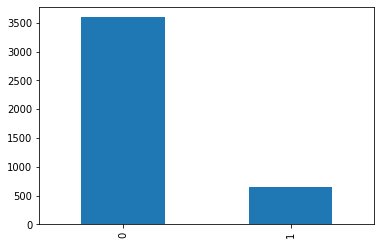

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
data = pd.read_csv('framingham.csv')
print(data["TenYearCHD"].value_counts())
print(data["TenYearCHD"].value_counts().plot(kind= "bar"))


Within the research paper, "Comparison of machine learning algorithms for clinical event prediction (risk of coronary heart disease)", this shows the missing table data in ‘Table 1’ FIND TABLE. This dataset is quite healthy in the % of missing results in each column, but handling the data is still an important choice and can result in bias no matter what we do. As the paper states “there is no perfect way to compensate for missing values” and after looking at the “5 ways to handle missing values data” I have decided to replace missing values with means. Not only does this prevent getting rid of missing values, as we already have a fairly small dataset so losing records would be a shame, but it is also what the research paper does and so for repeatability?/ comparability it seems that having the same dataset is a good idea. We can look at the distributions before and after doing this to make sure that the dataset results in a similar state.  


We can see from the entries that most of them are not null which is ideal for handling data as it means we don't have to introduce bias through how we handle the data. We can show that the big effects we do won't make a difference through box plotting the data accordingly. E.g. for the value glucose. 

This is the factor with the most n/a values and it only takes up 9% of the values. Initially, we will replace each value with the node as the paper, file:///C:/Users/charl/Downloads/Cervical_Cancer_prediction.pdf, also does. Although this may introduce bias, it can also help us check that our fair ML algorithms work when we run them. 

In [ ]:
for column in data.columns:
    data[column].fillna(data[column].mean(), inplace=True)

print(data.head(5))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

## Finding Bias between Demographic Groups 
We will now try and find any bias within the dataset by first dividing the data into demographic group subsets and looking at the results for each feature for each subset. This will hopefully show what bias I believe lies in the data. We will consider the following as our demographic groups:

- Gender
- Age
- CurrentSmoker

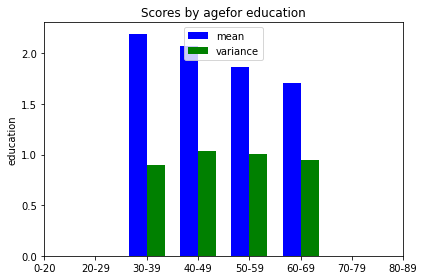

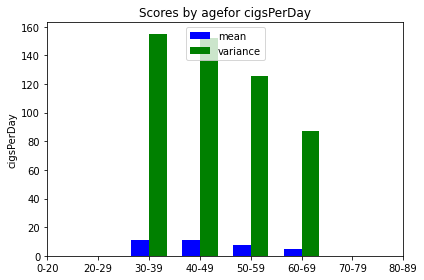

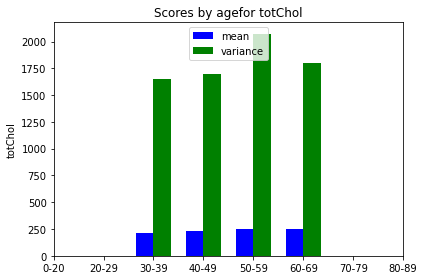

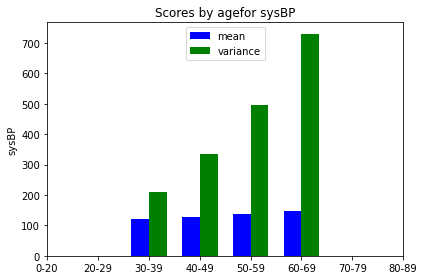

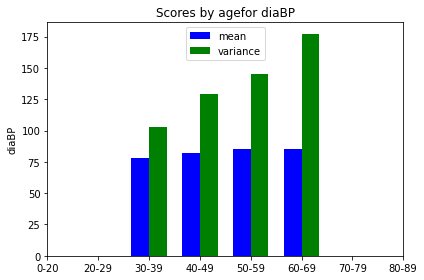

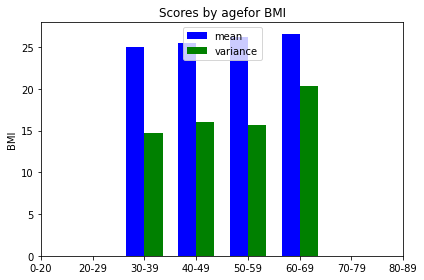

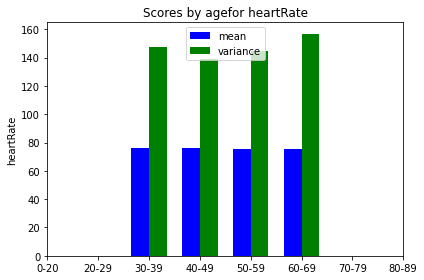

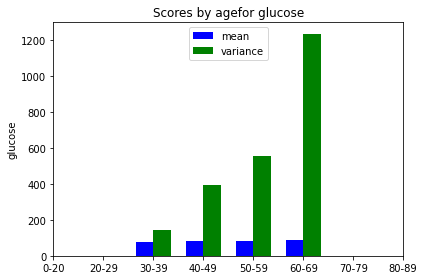

male
Series([], Name: male, dtype: int64)
Series([], Name: male, dtype: int64)
0    415
1    333
Name: male, dtype: int64
0    902
1    707
Name: male, dtype: int64
0    757
1    547
Name: male, dtype: int64
0    346
1    233
Name: male, dtype: int64
Series([], Name: male, dtype: int64)
Series([], Name: male, dtype: int64)


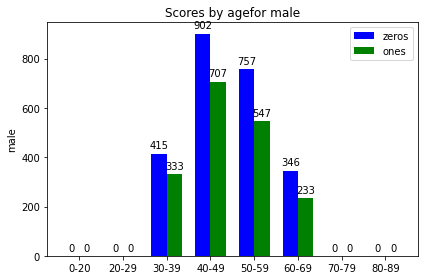

currentSmoker
Series([], Name: currentSmoker, dtype: int64)
Series([], Name: currentSmoker, dtype: int64)
1    448
0    300
Name: currentSmoker, dtype: int64
1    936
0    673
Name: currentSmoker, dtype: int64
0    766
1    538
Name: currentSmoker, dtype: int64
0    406
1    173
Name: currentSmoker, dtype: int64
Series([], Name: currentSmoker, dtype: int64)
Series([], Name: currentSmoker, dtype: int64)


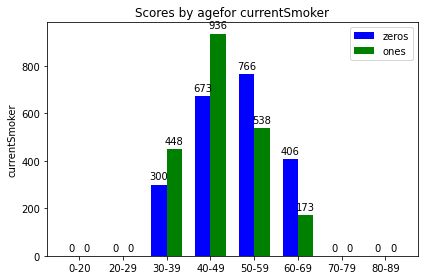

BPMeds
Series([], Name: BPMeds, dtype: int64)
Series([], Name: BPMeds, dtype: int64)
0.000000    739
0.029615      5
1.000000      4
Name: BPMeds, dtype: int64
0.000000    1566
1.000000      30
0.029615      13
Name: BPMeds, dtype: int64
0.000000    1226
1.000000      54
0.029615      24
Name: BPMeds, dtype: int64
0.000000    532
1.000000     36
0.029615     11
Name: BPMeds, dtype: int64
Series([], Name: BPMeds, dtype: int64)
Series([], Name: BPMeds, dtype: int64)


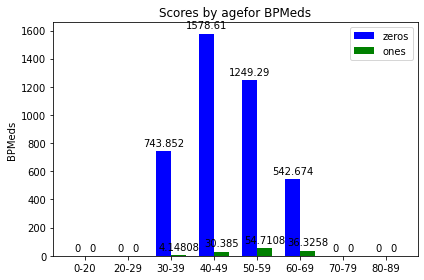

prevalentStroke
Series([], Name: prevalentStroke, dtype: int64)
Series([], Name: prevalentStroke, dtype: int64)
0    747
1      1
Name: prevalentStroke, dtype: int64
0    1606
1       3
Name: prevalentStroke, dtype: int64
0    1290
1      14
Name: prevalentStroke, dtype: int64
0    572
1      7
Name: prevalentStroke, dtype: int64
Series([], Name: prevalentStroke, dtype: int64)
Series([], Name: prevalentStroke, dtype: int64)


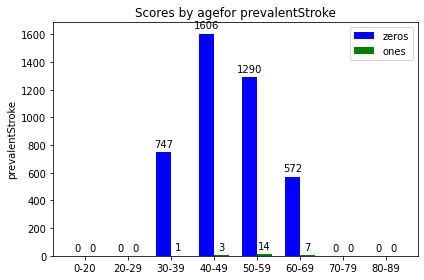

prevalentHyp
Series([], Name: prevalentHyp, dtype: int64)
Series([], Name: prevalentHyp, dtype: int64)
0    657
1     91
Name: prevalentHyp, dtype: int64
0    1225
1     384
Name: prevalentHyp, dtype: int64
0    777
1    527
Name: prevalentHyp, dtype: int64
1    315
0    264
Name: prevalentHyp, dtype: int64
Series([], Name: prevalentHyp, dtype: int64)
Series([], Name: prevalentHyp, dtype: int64)


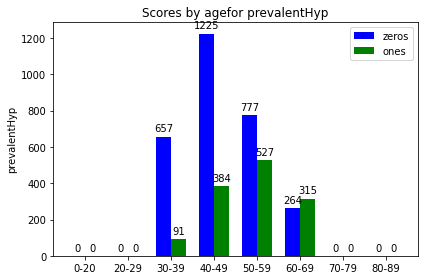

diabetes
Series([], Name: diabetes, dtype: int64)
Series([], Name: diabetes, dtype: int64)
0    744
1      4
Name: diabetes, dtype: int64
0    1580
1      29
Name: diabetes, dtype: int64
0    1261
1      43
Name: diabetes, dtype: int64
0    546
1     33
Name: diabetes, dtype: int64
Series([], Name: diabetes, dtype: int64)
Series([], Name: diabetes, dtype: int64)


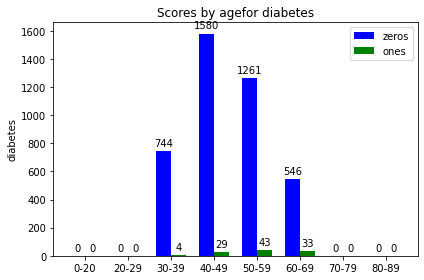

TenYearCHD
Series([], Name: TenYearCHD, dtype: int64)
Series([], Name: TenYearCHD, dtype: int64)
0    710
1     38
Name: TenYearCHD, dtype: int64
0    1434
1     175
Name: TenYearCHD, dtype: int64
0    1038
1     266
Name: TenYearCHD, dtype: int64
0    414
1    165
Name: TenYearCHD, dtype: int64
Series([], Name: TenYearCHD, dtype: int64)
Series([], Name: TenYearCHD, dtype: int64)


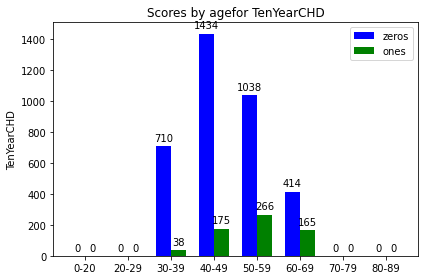

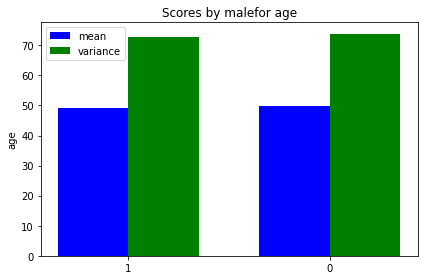

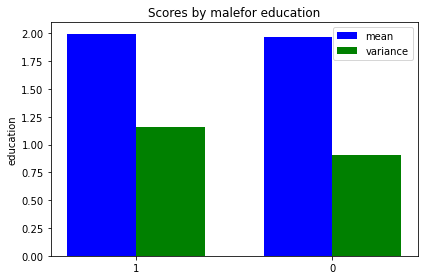

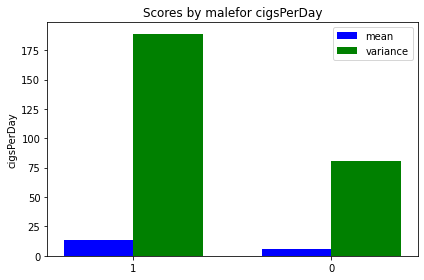

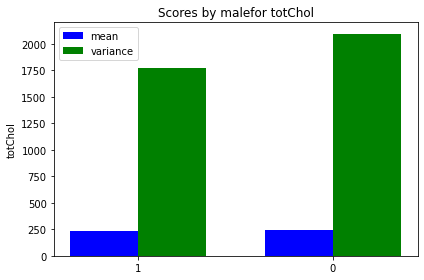

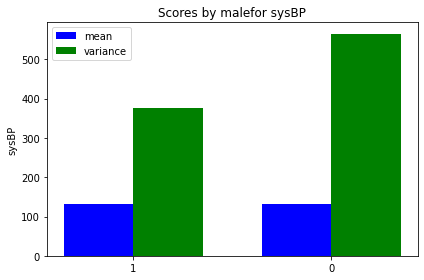

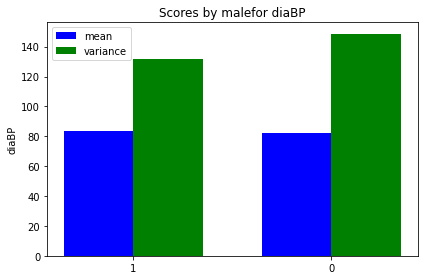

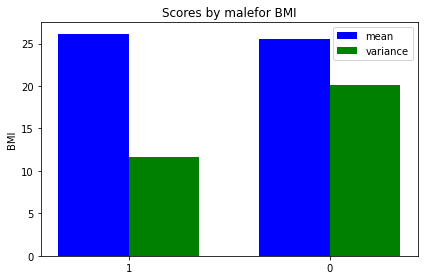

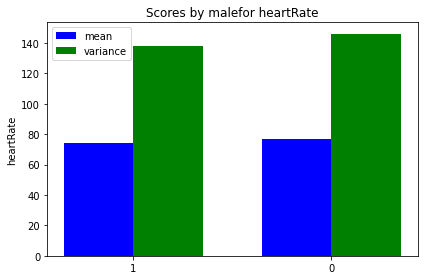

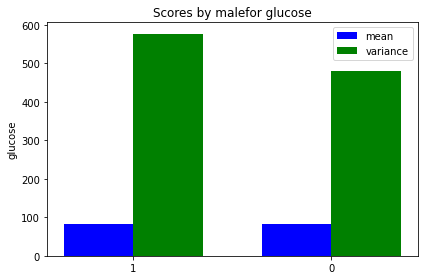

currentSmoker
1    1106
0     714
Name: currentSmoker, dtype: int64
0    1431
1     989
Name: currentSmoker, dtype: int64


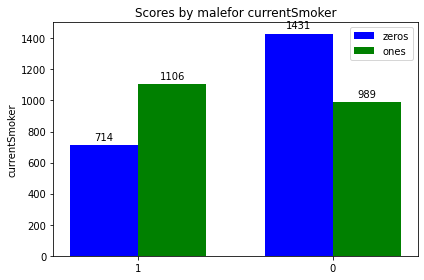

BPMeds
0.000000    1770
1.000000      35
0.029615      15
Name: BPMeds, dtype: int64
0.000000    2293
1.000000      89
0.029615      38
Name: BPMeds, dtype: int64


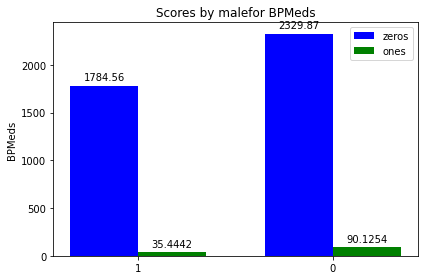

prevalentStroke
0    1810
1      10
Name: prevalentStroke, dtype: int64
0    2405
1      15
Name: prevalentStroke, dtype: int64


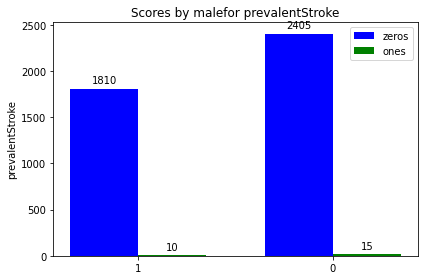

prevalentHyp
0    1249
1     571
Name: prevalentHyp, dtype: int64
0    1674
1     746
Name: prevalentHyp, dtype: int64


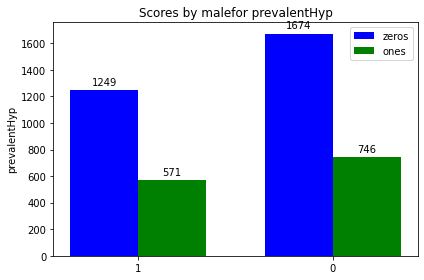

diabetes
0    1768
1      52
Name: diabetes, dtype: int64
0    2363
1      57
Name: diabetes, dtype: int64


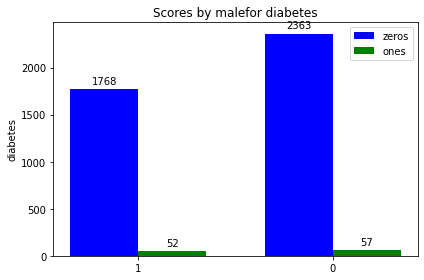

TenYearCHD
0    1477
1     343
Name: TenYearCHD, dtype: int64
0    2119
1     301
Name: TenYearCHD, dtype: int64


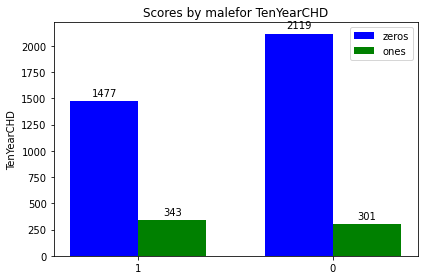

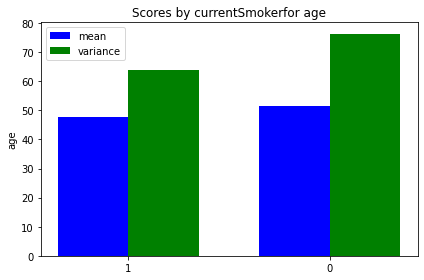

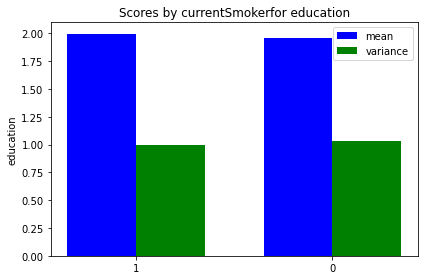

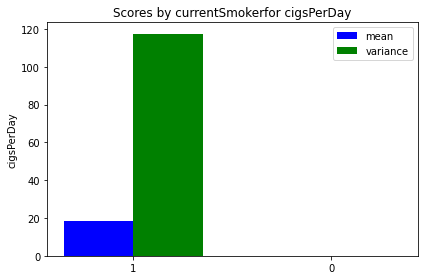

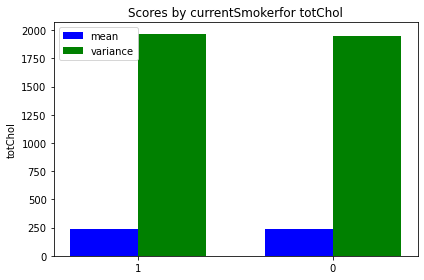

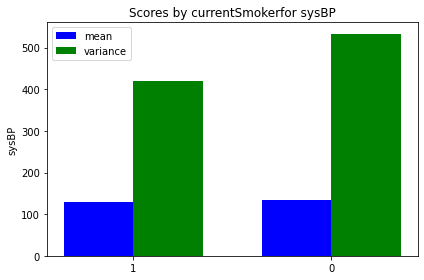

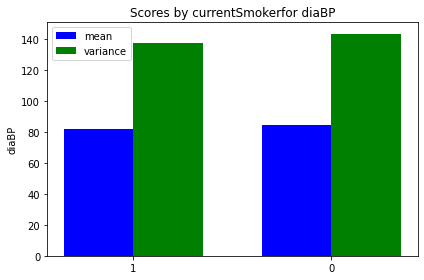

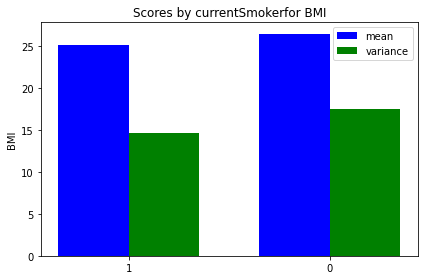

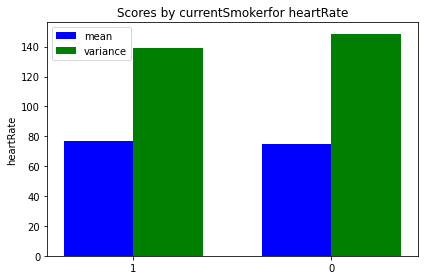

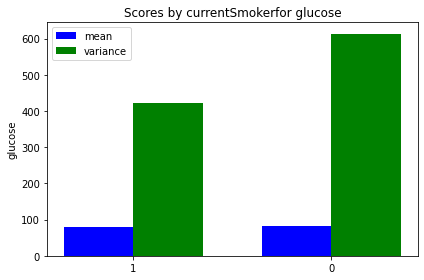

male
1    1106
0     989
Name: male, dtype: int64
0    1431
1     714
Name: male, dtype: int64


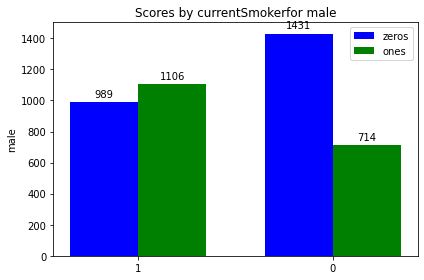

BPMeds
0.000000    2028
1.000000      44
0.029615      23
Name: BPMeds, dtype: int64
0.000000    2035
1.000000      80
0.029615      30
Name: BPMeds, dtype: int64


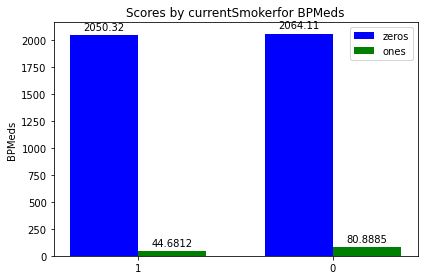

prevalentStroke
0    2088
1       7
Name: prevalentStroke, dtype: int64
0    2127
1      18
Name: prevalentStroke, dtype: int64


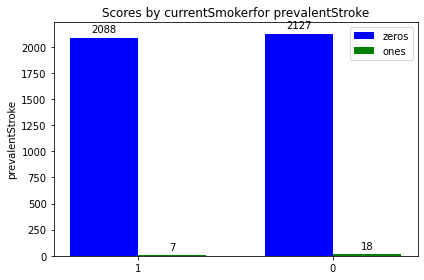

prevalentHyp
0    1546
1     549
Name: prevalentHyp, dtype: int64
0    1377
1     768
Name: prevalentHyp, dtype: int64


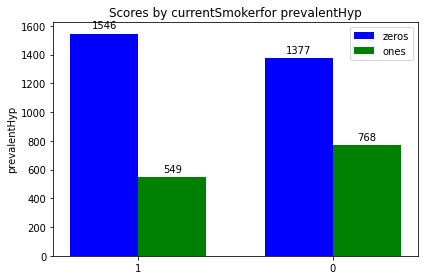

diabetes
0    2056
1      39
Name: diabetes, dtype: int64
0    2075
1      70
Name: diabetes, dtype: int64


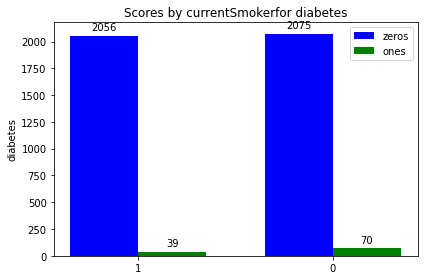

TenYearCHD
0    1762
1     333
Name: TenYearCHD, dtype: int64
0    1834
1     311
Name: TenYearCHD, dtype: int64


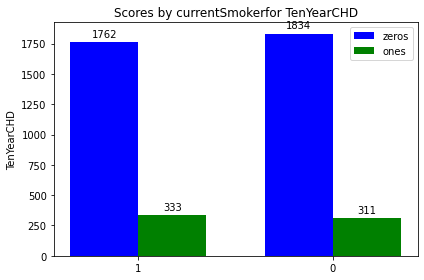

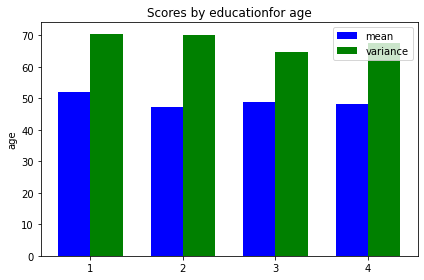

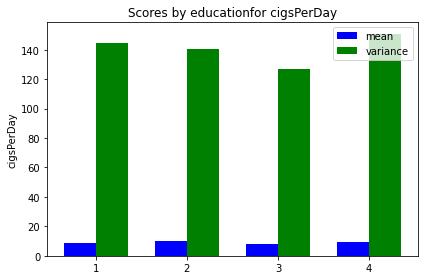

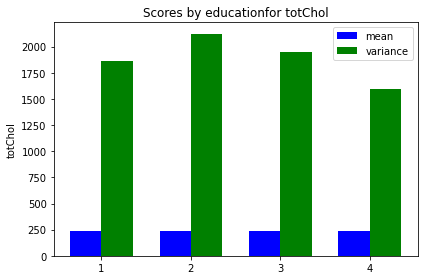

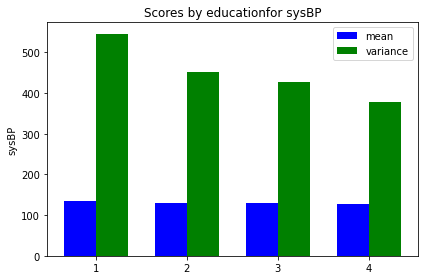

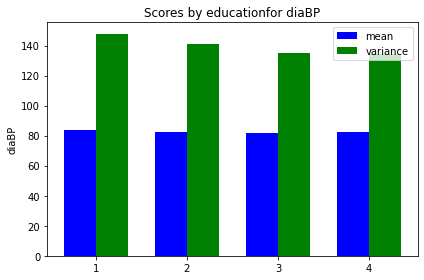

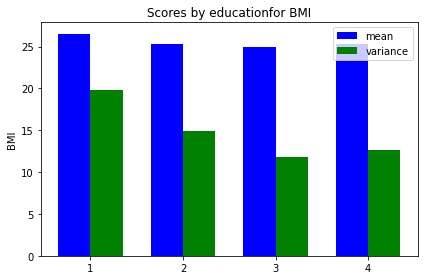

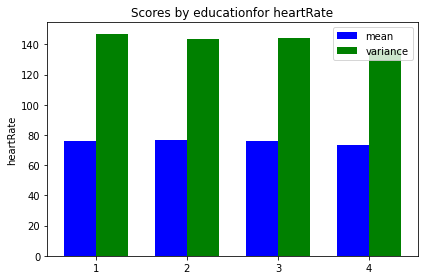

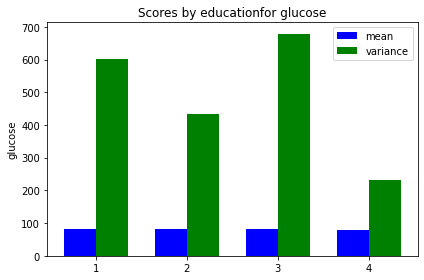

male
0    943
1    777
Name: male, dtype: int64
0    764
1    489
Name: male, dtype: int64
0    464
1    225
Name: male, dtype: int64
1    276
0    197
Name: male, dtype: int64


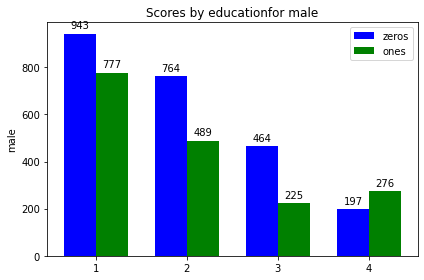

currentSmoker
0    915
1    805
Name: currentSmoker, dtype: int64
1    679
0    574
Name: currentSmoker, dtype: int64
0    367
1    322
Name: currentSmoker, dtype: int64
1    240
0    233
Name: currentSmoker, dtype: int64


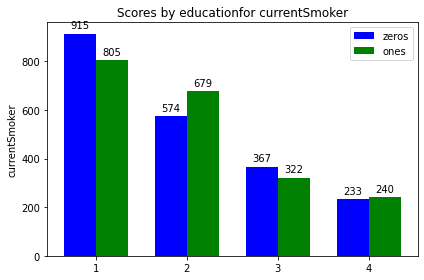

BPMeds
0.000000    1639
1.000000      53
0.029615      28
Name: BPMeds, dtype: int64
0.000000    1205
1.000000      38
0.029615      10
Name: BPMeds, dtype: int64
0.000000    663
1.000000     17
0.029615      9
Name: BPMeds, dtype: int64
0.000000    454
1.000000     13
0.029615      6
Name: BPMeds, dtype: int64


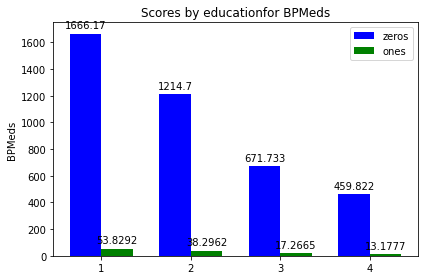

prevalentStroke
0    1705
1      15
Name: prevalentStroke, dtype: int64
0    1246
1       7
Name: prevalentStroke, dtype: int64
0    686
1      3
Name: prevalentStroke, dtype: int64
0    473
Name: prevalentStroke, dtype: int64


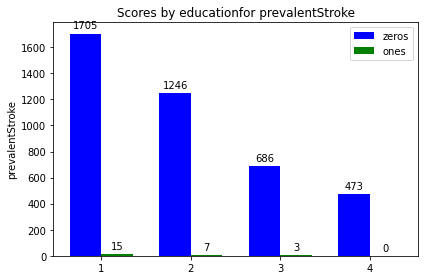

prevalentHyp
0    1099
1     621
Name: prevalentHyp, dtype: int64
0    894
1    359
Name: prevalentHyp, dtype: int64
0    510
1    179
Name: prevalentHyp, dtype: int64
0    345
1    128
Name: prevalentHyp, dtype: int64


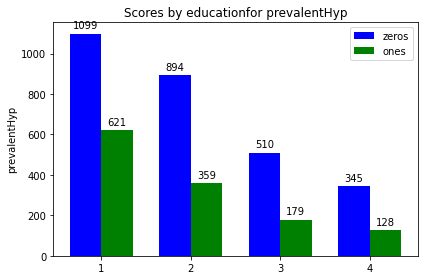

diabetes
0    1660
1      60
Name: diabetes, dtype: int64
0    1230
1      23
Name: diabetes, dtype: int64
0    675
1     14
Name: diabetes, dtype: int64
0    464
1      9
Name: diabetes, dtype: int64


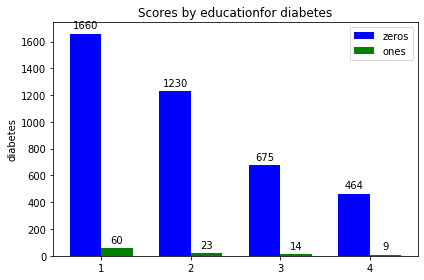

TenYearCHD
0    1397
1     323
Name: TenYearCHD, dtype: int64
0    1106
1     147
Name: TenYearCHD, dtype: int64
0    601
1     88
Name: TenYearCHD, dtype: int64
0    403
1     70
Name: TenYearCHD, dtype: int64


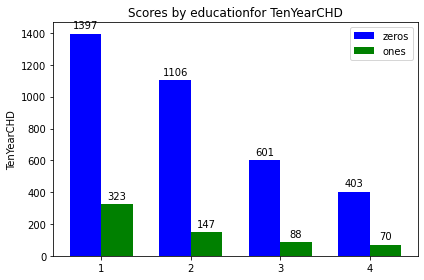

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def demographic_groups_split(demographic_group, feature_concerned):

    numeric_features = ["age", "education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
    categoric_features = ["male", "currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"]


    for feature in numeric_features:
        if feature != feature_concerned:
            if feature_concerned == "age":
                data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

            table = []
            variance = []
            
            for category in demographic_group:
                data2 = data.copy()
                data2["temp"] = 1
                if feature_concerned == "age":
                    data2.loc[data2["age_bins"] != category, "temp"] = np.NaN

                else:
                    data2.loc[data2[feature_concerned] != category, "temp"] = np.NaN

                data2 = data2[data2.temp.notnull()]    
                if data2[feature].mean() == np.NaN:
                    table.append("0")
                    
                else:
                    table.append(data2[feature].mean())

                if data2[feature].var() == np.NaN:
                    variance.append("0")       

                else:
                    variance.append(data2[feature].var())

            X = np.arange(len(demographic_group))
            width = 0.35  # the width of the bar
            fig, ax = plt.subplots()
            bar1 = ax.bar(X - width/2, table, color = 'b',width= 0.35, label= 'mean')
            bar2 = ax.bar(X + width/2, variance, color = 'g',width= 0.35, label= 'variance')

            ax.set_ylabel(feature)
            ax.set_title('Scores by ' + str(feature_concerned) + 'for ' + str(feature))
            ax.set_xticks(X)
            ax.set_xticklabels(demographic_group)
            ax.legend()

            fig.tight_layout()

            plt.show()
            
    for feature2 in categoric_features:
        if feature2 != feature_concerned:
            print(feature2)
            if feature_concerned == "age":
                data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

            ones = []
            zeros = []

            for category in demographic_group:
                data3 = data.copy()
                data3["temp"] = 1
                if feature_concerned == "age":
                    data3.loc[data3["age_bins"] != category, "temp"] = np.NaN

                else:
                    data3.loc[data3[feature_concerned] != category, "temp"] = np.NaN

                data3 = data3[data3.temp.notnull()]    
                print(data3[feature2].value_counts())

                zeros.append(len(data3.index) - data3[feature2].sum())
                ones.append(data3[feature2].sum())

            X = np.arange(len(demographic_group))
            width = 0.35  # the width of the bar
            fig, ax = plt.subplots()
            bar1 = ax.bar(X - width/2, zeros, color = 'b', width= 0.35, label= 'zeros')
            bar2 = ax.bar(X + width/2, ones, color = 'g', width= 0.35, label= 'ones')

            ax.set_ylabel(feature2)
            ax.set_title('Scores by ' + str(feature_concerned) + 'for ' + str(feature2))
            ax.set_xticks(X)
            ax.set_xticklabels(demographic_group)
            ax.legend()
            ax.bar_label(bar1, padding=3)
            ax.bar_label(bar2, padding=3)
            fig.tight_layout()

            plt.show()

demographic_groups_split(["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"], "age")
demographic_groups_split([1,0], "male")
demographic_groups_split([1,0], "currentSmoker")
demographic_groups_split([1,2,3,4],"education")


### Calculating Disparate Impact and Statistical parity difference between Males and Females

343
301
0.18846153846153846
0.1243801652892562


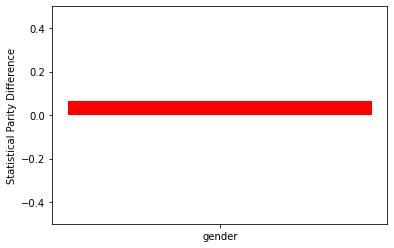

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

initial_data = pd.read_csv('framingham.csv')
male_data = initial_data.copy()
female_data = initial_data.copy()

male_data.loc[male_data["male"] != 1, "male"] = np.NaN
male_data = male_data[male_data.male.notnull()]
male_total = len(male_data.index)


male_data.loc[male_data["TenYearCHD"] != 1, "TenYearCHD"] = np.NaN
male_data = male_data[male_data.TenYearCHD.notnull()]
# this is the number of males in the data set 
male_pos_outcomes = len(male_data.index)


female_data.loc[female_data["male"] != 0, "male"] = np.NaN
female_data = female_data[female_data.male.notnull()]
female_total = len(female_data.index)

female_data.loc[female_data["TenYearCHD"] != 1, "TenYearCHD"] = np.NaN
female_data = female_data[female_data.TenYearCHD.notnull()]
# this is the number of males in the data set 
female_pos_outcomes = len(female_data.index)


print(male_pos_outcomes)
print(female_pos_outcomes)

prob_pos_given_male = male_pos_outcomes/male_total
prob_pos_given_female = female_pos_outcomes/female_total

print(prob_pos_given_male)
print(prob_pos_given_female)
spd_diff = prob_pos_given_male - prob_pos_given_female

x = "gender"

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, spd_diff, width= 0.25,color= 'r')
plt.ylabel("Statistical Parity Difference")
plt.ylim(-0.5, 0.5)
plt.show()


# Task 2: Analysing the bias's existent in the dataset. 

It is clear within this within this dataset that some bias exists. We will use the graphs above to show where this bias occurs. 

### Size of the groups:
#### In each demographic group, we wil show each sub-groups size within the dataset:
- Gender:  
    Male: 2025
    Female: 2220 
- Age: 
    30-39:
    40-49:
    50-59:
    60-69:

- Current Smoker: 
    Yes: 
    No:


### Analysing bias: 
Within the demographic subgroups, I have noticed that a higher proportion of men are predicted to have 10 Year CHD compared to women. The bias that I have seen can be displayed using either Statistical Parity Difference or Disparate Impact. Using either of these fair metrics, we can see there is a bias between genders. To understand the reasons behind this, we can look at other features and demographic groups. 

When looking at "CurrentSmoker" to TenYearCHD, although the demographic parity check seems to be met with this data, it is well known that smoking does increase the chances of having CHD. Indirect bias can be introduced through other features, such as the fact more males on average have more cigs per day than compared to women as well as there are more male current smokers than female. This could be due to social context at the time as most patients are 30+ in age, so at the time more men did smoke than women. This could explain why more men have CHD. 

When we look at "age" to TenYearCHD, this shows the algorithm may show bias in predicting older people as positive with CHD compared to youth. The following outlines the probability of having CHD given you are in a certain age group:

Age     |   Probability of having TenYearCHD

30-39   |   0.0508
40-49   |   0.1087
50-59   |   0.2040
60-69   |   0.2850 

We can see that the probably is not equal in each group but bias towards towards older patients. 


Looking at Age and Gender:
Although there are more women than men in general, the % of men in each age group stays consistently between 35-40%. Since this is consistent believe that the two are independent. E.g. the bias between women and men won’t directly affect the bias in age groups. 

Looking at Age and Current Smoker:

Looking at the results, it seems that smoking did not have the biggest effect with age as the most prevalent age groups for smoking were the younger groups such as 30-39 and 40-49. These had the lowest probabilities of having a CHD in 10 years given their age group . One possible explanation for this is not that the correlation between smoking and CHD does not exist, but the younger an individual is, the less smoking will effect them as they are “healthy”. This means that by looking at measurable indicators for health, such as High Blood Pressure and Hypertensives, this may explain a reason for pushing the bias towards the older you are, the more likely you are to have a CHD  in 10 years. One extension of the relation between smoking and age could be that for younger patients there are more women then men, whilst the reverse for older patients. If more men smoke than women then this could lead to more indirect bias as this could increase the chances of them having CHD. Although this is an unjustified statement, I think it is a reasonable hypothesis.  This distribution remained consistent after resampling the data.

When looking at the medical graphs to do with age, including:

- Scores by agefor BPMeds
- Scores by agefor prevalentStroke
- Scores by agefor prevalentHyp
- Scores by agefor diabetes

we see that the probability of having prevalent hypertension, diabetes, a past stroke or are on blood pressure meds all increase with age. These are all factors that are related to Coronary Heart Disease, some directly and some indicators, but all providing justification to why the algorithm could be more bias to older people compared to younger. 

Lastly, we can look at how a factor may not introduce bias. When we look at the relationship between education and TenYearCHD, each demographic subgroup has a similar probability of having CHD after 10 years given their education. For each graph apart from 2, each group has a similar distribution to one another giving me confidence that there is no indirect bias occuring either. 

# Task 3: Conventional Implementation
At the beginning of this project when I looked into the dataset, I knew that we would have to do some debiasing in order to balance our target variable data, which had 85% positive (of getting CHD in next 10 years) and 15 % negative. 
When running our algorithm, we can see the results we obtain using Logistic Regression. Logistic Regression is a type of classification algorithm, most effective with binary classification which is what our problem is. It is used to predict the probability of a categorical dependent variable, and so predicts P(outcome = 1) as a function of X, which contains all of the relevant feature information. It uses a  sigmoid functio to describe the relationship between variables and will tell us the probability of a person having a "10YearCHD" based on their features, as a probabilistic value between 0 and 1. We then use a threshold, which is set at 0.5, to classify the value into 0 or 1. I decided to use this model as it was fairly easy to understand and according to the comparison paper, gave "comparible results to more complex algorithms".It has a fast run time and is a well-known algorithm for binary classification. It is much better than linear regression for example at these types of problems and is also faster than SVM for the size of the dataset that we have. 

## Skewed Target Variable: 
When we first output the value counts of the "outcome" bar within the dataset, we can see how skewed the dataset is as 84.9 % of outcomes are negative (0). This will mean that the algorithm can just predict positive everytime and still achieve an accuracy of 84.9 % which is similar to the results in the comparison paper. They acknowledge that this may not be fair within the paper, but do nothing to mitigate the issue. 

0    3596
1     644
Name: TenYearCHD, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


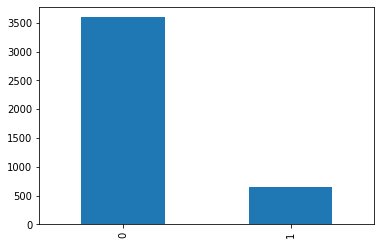

In [ ]:
print(data["TenYearCHD"].value_counts())
print(data["TenYearCHD"].value_counts().plot(kind= "bar"))


## Splitting the data: 
I will now split the data into testing and training data and see how the algorithm performs. I sued the following code for hyperparameter tuning to see which model fit best: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

NEED TO FIND CODE FOR THE OUTPUT OF HEATMAPS


Best: 0.851417 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.850407 (0.008812) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847709 (0.004103) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.850742 (0.008145) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.850631 (0.008846) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847148 (0.003990) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.851417 (0.008043) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.851192 (0.008762) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847485 (0.004133) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.849508 (0.005466) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.851304 (0.007548) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847822 (0.004128) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848271 (0.004085) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.850742 (0.007010) with

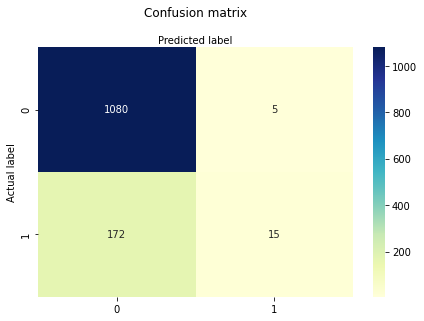

Accuracy: 0.8608490566037735
Precision: 0.75
Recall: 0.08021390374331551


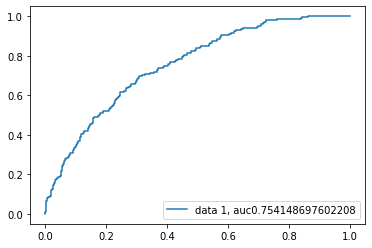

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm


feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

X = data[feature_cols] # Features
y = data.TenYearCHD # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# the above code showed me that all of the hyperparameter results
# were very similar to the point I felt like it did not matter too
# much what I chose. newton-cg had good results no matter what 
# the other hyperparameters were so I decided to use that as 
# my solver within the logistic regression model. 

logreg = LogisticRegression(solver="newton-cg")

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)



# NEED TO FIND WHERE I GOT THIS CODE FROM

from sklearn import metrics

dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(dtf_matrix)

# also need to visualise the confusion matrix using a Heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1]
fix, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# precision means when a model makes a prediction, how often it is correct.
# when my model predicts patients are going to suffer from diabetes, it was correct
# 76% of the time.

y_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

auc = metrics.roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
plt.legend(loc=4)
plt.show()

My approach for training the model and seeing how it generalises was first to tune all the hyperparameters for the data, using existing code I found online. I knew GridSearch was a powerful hypertuning tool and that I would use it within my project. Although I have not used the optimum parameters, I have used the 'newton-cg' model as it consistently achieved high accuracy in all results. The results predict every case as negative 98.4% of the time, achieving an accuracy of ~85% which although may appear impressive and is higher than the comparison paper's,it means that 15 % of our results give false negatives. We predicted this before we even started the project as this is ubiquitous in medical datasets, yet there is no obvious solution. The aim is to try and minimise the number of false negatives as much as possible though even at the sacrifice in accuracy in my opinion, which this model does not do. Giving someone hope that they will not get CHD in 10 years when in fact they do (a false negative) is far worse than saying someone will even when they won't (a false positive). Our motivation is thus to achieve a high sensitivity at the cost of low specificity. I would say no obvious overfitting has occured, nor underfitting. We can try and use new data to test this.  

## Subsampling a fair dataset
I am now going to create a fair subset and test it on the model. However, due to the massively skewed target variable I think we will see similar results as before. 

male                   1
age                   39
education            4.0
currentSmoker          0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol            195.0
sysBP              106.0
diaBP               70.0
BMI                26.97
heartRate           80.0
glucose             77.0
TenYearCHD             0
age_bins           30-39
Name: 0, dtype: object
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
939    0.0   40        3.0            0.0         0.0     0.0   
3173   0.0   36        2.0            0.0         0.0     0.0   
1562   0.0   37        3.0            0.0         0.0     0.0   
3099   0.0   40        2.0            0.0         0.0     0.0   
2912   0.0   39        2.0            0.0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
952    1.0   66        1.0            1.0        30.0     0.0   
1279   1.0   64        1.0      

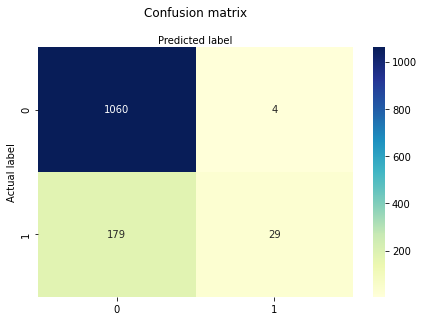

Accuracy: 0.8561320754716981
Precision: 0.8787878787878788
Recall: 0.13942307692307693


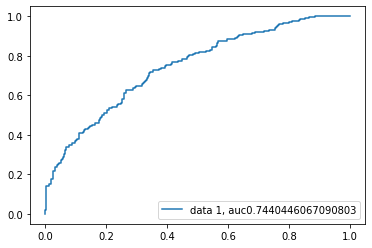

In [ ]:
def building_a_fair_subset(data):
    ages = ["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0, 1]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)

    #for CHD_option in TenYearCHD:
    #data3 = data.copy()
    #data3.loc[data3["TenYearCHD"] != CHD_option, "TenYearCHD"] = np.NaN
    #data3 = data3[data3.TenYearCHD.notnull()]

    for gender_option in genders:
        data4 = data.copy()
        data4.loc[data4["male"] != gender_option, "male"] = np.NaN
        data4 = data4[data4.male.notnull()]

        for smoker_option in currentSmokers:
            data5 = data4.copy()
            data5.loc[data5["currentSmoker"] != smoker_option, "currentSmoker"] = np.NaN
            data5 = data5[data5.currentSmoker.notnull()]

            for age in ages:
                data6 = data5.copy()
                data6.loc[data6["age_bins"] != age, "age_bins"] = np.NaN
                data6 = data6[data6.age_bins.notnull()]
                if len(data6.index) != 0:
                    if count == 0:
                        data7 = data6.sample(n=265, replace=True, random_state=1)
                        count +=1

                    else:
                        data8 = data6.sample(n=265, replace=True, random_state=1)
                        data7 = data7.append(data8)


    print(data7)
    return data7


data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])


data2 = building_a_fair_subset(data)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm


feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']


X = data2[feature_cols] # Features
y = data2.TenYearCHD # Target variable

X_train2,X_test,y_train2,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver= 'newton-cg')

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)



from sklearn import metrics

dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(dtf_matrix)

# also need to visualise the confusion matrix using a Heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1]
fix, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# precision means when a model makes a prediction, how often it is correct.
# when my model predicts patients are going to suffer from diabetes, it was correct
# 76% of the time.

y_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

auc = metrics.roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
plt.legend(loc=4)
plt.show()


Through including a more balanced dataset, this means that there should be a greater number of negative outcomes in the test dataset (a 50:50 split rather than the test set we took from the skewed dataset). This explains why we have more true negatives and less false positives. However, the number of false negatives has increased, which makes sense to show the system is biased towards predicting positive each time. As we have taken a fair dataset but trained it on a dataset based on a skewed target variable, the desire to predict positives for data has shown by the increase in this value. Although we could argue that by including an "fair" representation to ensure age, diversity and gender has included more negative results and thus exposed some bias, I don't think this bias shown says much about the demographic groups but rather the distribution of the target variable. I am going to do this again on a "non-skewed" target variable to see if I can see demographic bias. 

## Balancing the Target Variable

Initially, I tried to use the linear regression class_weight parameter, setting it to 'balanced' and setting my solver to a multiclassifier like 'newton-cg' (I chose this as it had my intials). This was to just get an understanding of how weighing the data changes outputs. 

[[727 358]
 [ 56 131]]


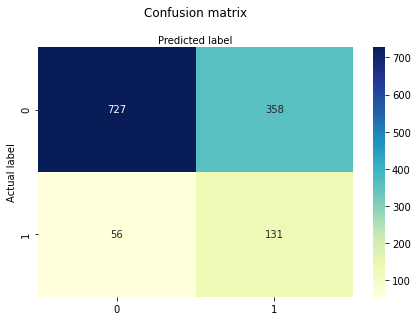

Accuracy: 0.6745283018867925
Precision: 0.26789366053169733
Recall: 0.7005347593582888


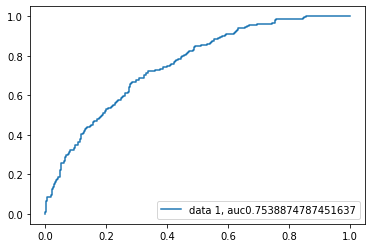

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm


feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

X = data[feature_cols] # Features
y = data.TenYearCHD # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver= 'newton-cg',class_weight= 'balanced')

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# svmd = svm.SVC(kernel='linear',probability= True)

# svmd.fit(X_train, y_train)
# y_pred = svmd.predict(X_test)

from sklearn import metrics

dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(dtf_matrix)

# also need to visualise the confusion matrix using a Heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1]
fix, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# precision means when a model makes a prediction, how often it is correct.
# when my model predicts patients are going to suffer from diabetes, it was correct
# 76% of the time.

y_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

auc = metrics.roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
plt.legend(loc=4)
plt.show()

This got me more balanced data showing me that rebalancing definitely was achievable with my own implementation. I then decided to try and add my own weights to the data, using the sample_weight= parameter in .fit() to add my additional weights. I have incremented the data for 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0 and have obtained the following results:

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

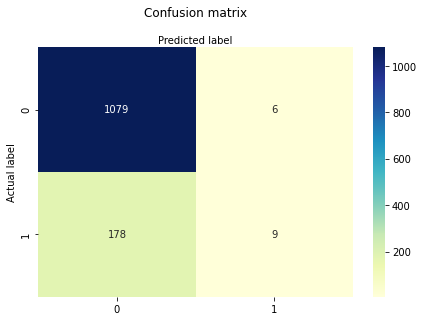

Accuracy: 0.8553459119496856
Precision: 0.6
Recall: 0.0481283422459893


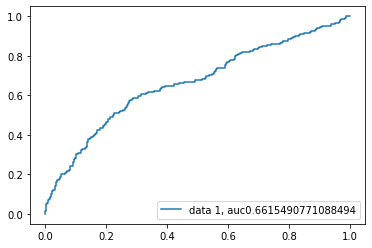

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

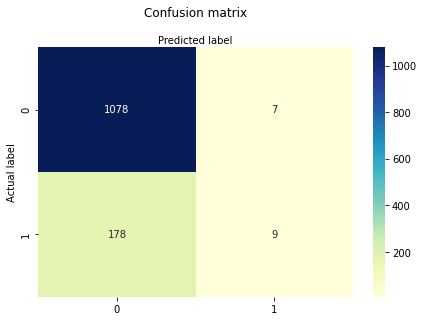

Accuracy: 0.8545597484276729
Precision: 0.5625
Recall: 0.0481283422459893


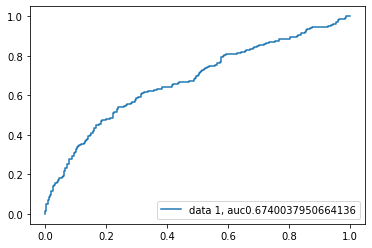

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

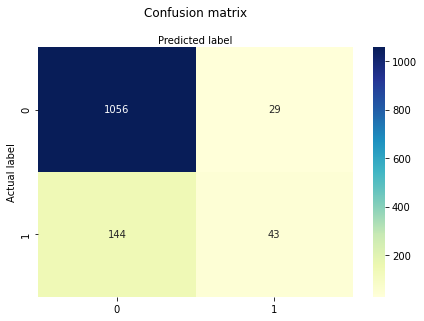

Accuracy: 0.8639937106918238
Precision: 0.5972222222222222
Recall: 0.22994652406417113


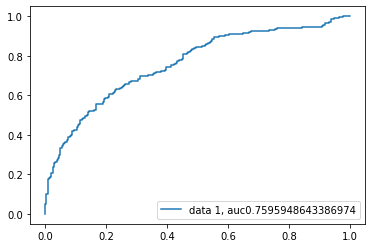

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

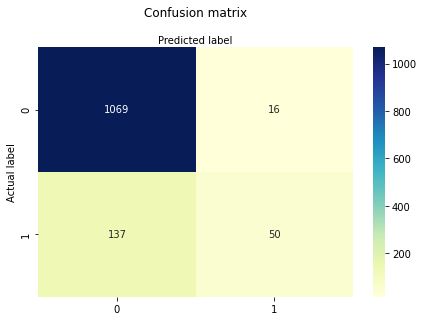

Accuracy: 0.8797169811320755
Precision: 0.7575757575757576
Recall: 0.26737967914438504


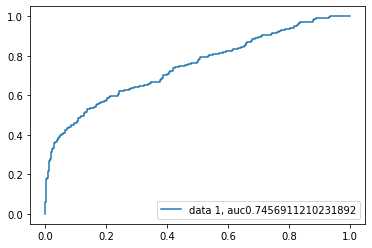

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

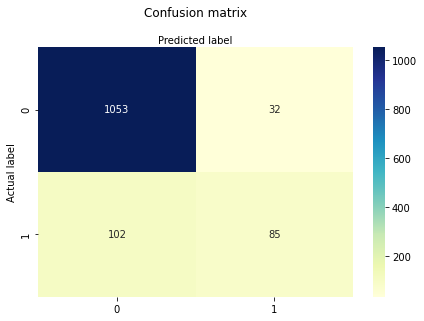

Accuracy: 0.8946540880503144
Precision: 0.7264957264957265
Recall: 0.45454545454545453


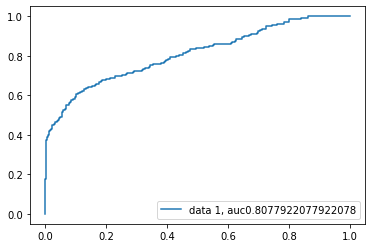

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

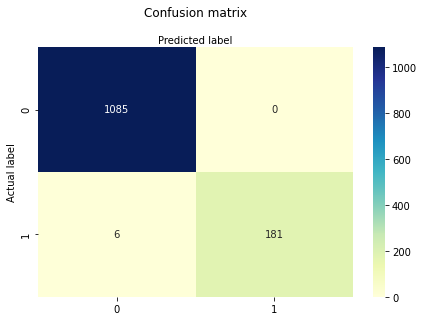

Accuracy: 0.9952830188679245
Precision: 1.0
Recall: 0.9679144385026738


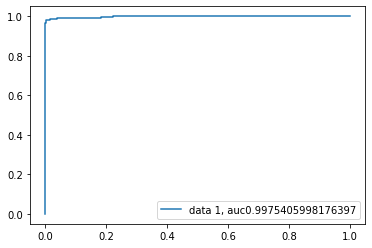

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

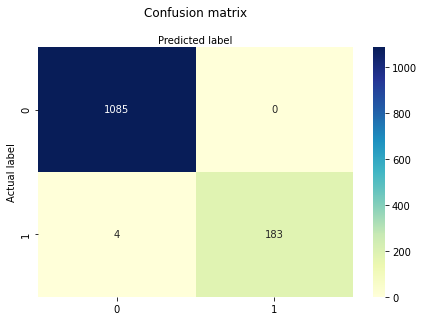

Accuracy: 0.9968553459119497
Precision: 1.0
Recall: 0.9786096256684492


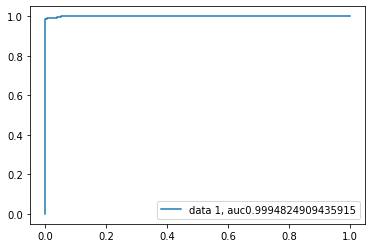

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

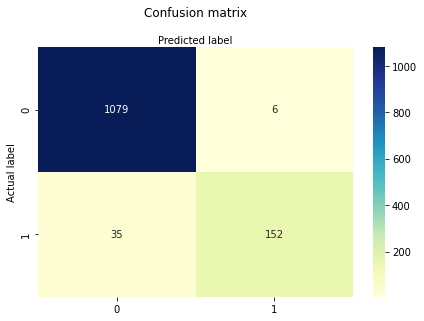

Accuracy: 0.9677672955974843
Precision: 0.9620253164556962
Recall: 0.8128342245989305


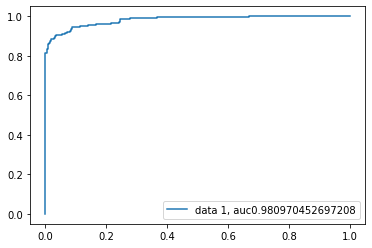

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

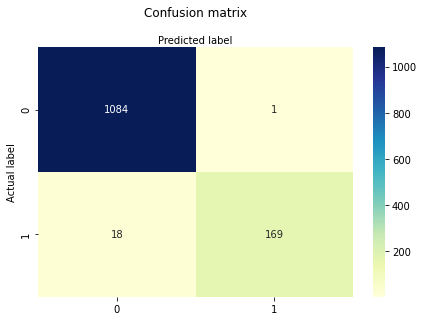

Accuracy: 0.985062893081761
Precision: 0.9941176470588236
Recall: 0.9037433155080213


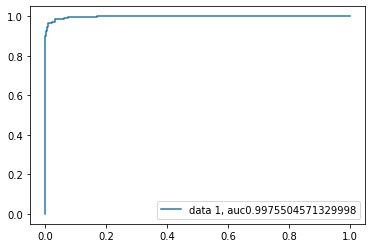

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

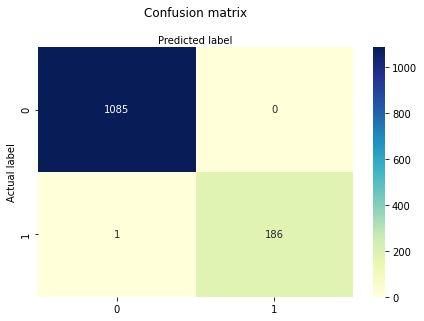

Accuracy: 0.9992138364779874
Precision: 1.0
Recall: 0.9946524064171123


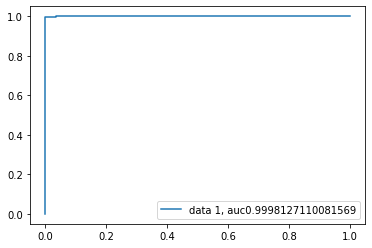

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


for i in range(1,11):
    data = pd.read_csv('framingham.csv')
    data["new_column_weights"] = 1
    data.loc[data["TenYearCHD"] == 1,"new_column_weights"] = 1 + (i/10)
    data.loc[data["TenYearCHD"] == 0,"new_column_weights"] = 1


    for column in data.columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    print(data.head(5))


    labels = ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
    data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

    print(data.head(5))

    print(data["TenYearCHD"].value_counts())
    import numpy as np


    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn import svm


    feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                    'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose',"new_column_weights"]

    X = data[feature_cols] # Features
    y = data.TenYearCHD # Target variable

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression()

    logreg.fit(X_train, y_train, sample_weight= X_train["new_column_weights"])
    y_pred = logreg.predict(X_test)

    # svmd = svm.SVC(kernel='linear',probability= True)

    # svmd.fit(X_train, y_train)
    # y_pred = svmd.predict(X_test)

    from sklearn import metrics

    dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(dtf_matrix)

    # also need to visualise the confusion matrix using a Heatmap

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_names = [0,1]
    fix, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

    # precision means when a model makes a prediction, how often it is correct.
    # when my model predicts patients are going to suffer from diabetes, it was correct
    # 76% of the time.

    y_prob = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

    auc = metrics.roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
    plt.legend(loc=4)
    plt.show()


We can see from these results that reweighting the data looks like it is working. I believe anything after 1.6 is overfitting as our accuracy is 0.99, precision is 1.0 and recall is 0.96 meaning it may not handle new data well. We can test this theory with a validation set DO IT. However, our results for 1.5 look pretty healthy, with our accuracy at 0.89, precision at 0.72 and recall at 0.45. This still has 102 false positive cases, so we will try and get a "healthy" model by setting our weight somewhere between 1.5 and 1.6, and seeing if the biases still remain in the data. (hopefully they do so that we can still mitigate them). 

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

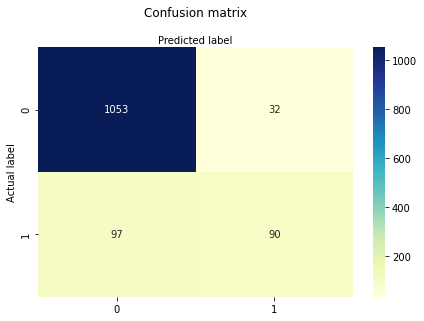

Accuracy: 0.8985849056603774
Precision: 0.7377049180327869
Recall: 0.48128342245989303


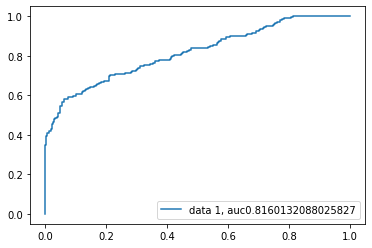

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

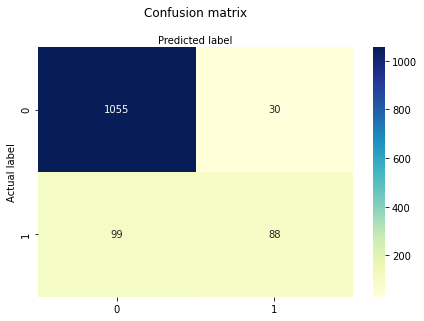

Accuracy: 0.8985849056603774
Precision: 0.7457627118644068
Recall: 0.47058823529411764


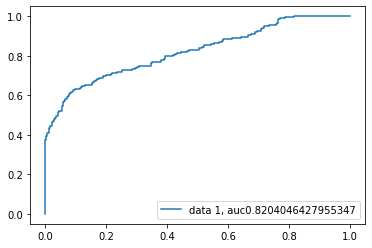

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

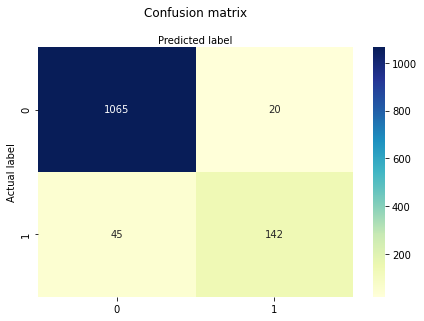

Accuracy: 0.9488993710691824
Precision: 0.8765432098765432
Recall: 0.7593582887700535


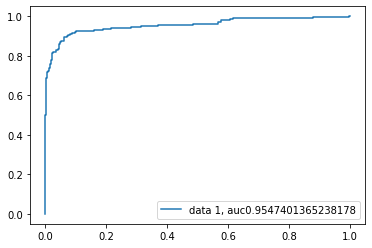

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

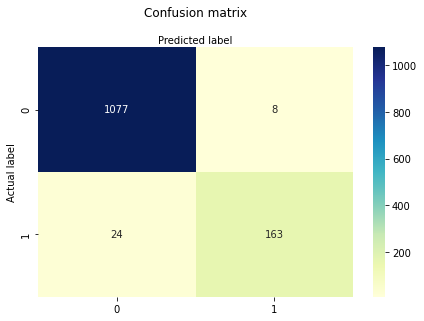

Accuracy: 0.9748427672955975
Precision: 0.9532163742690059
Recall: 0.8716577540106952


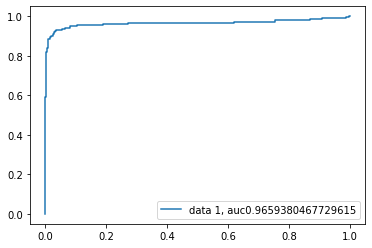

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

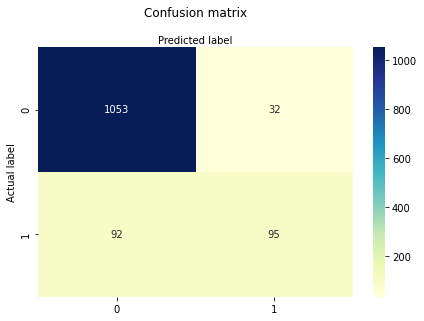

Accuracy: 0.9025157232704403
Precision: 0.7480314960629921
Recall: 0.5080213903743316


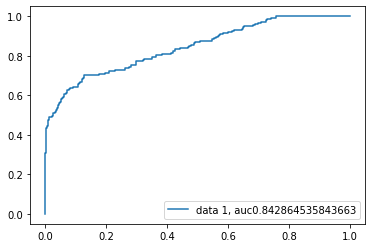

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

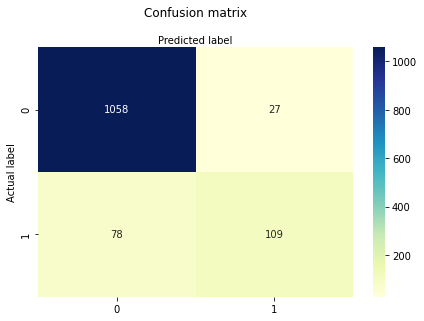

Accuracy: 0.9174528301886793
Precision: 0.8014705882352942
Recall: 0.5828877005347594


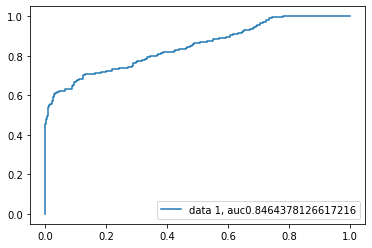

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

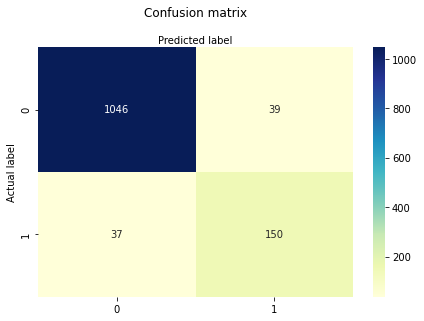

Accuracy: 0.940251572327044
Precision: 0.7936507936507936
Recall: 0.8021390374331551


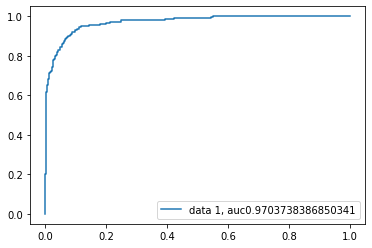

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

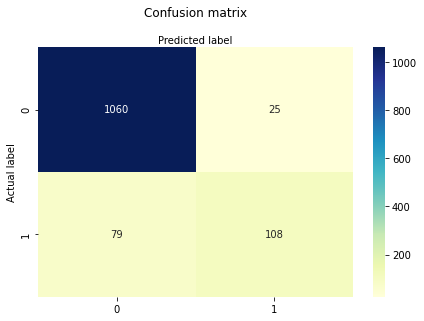

Accuracy: 0.9182389937106918
Precision: 0.8120300751879699
Recall: 0.5775401069518716


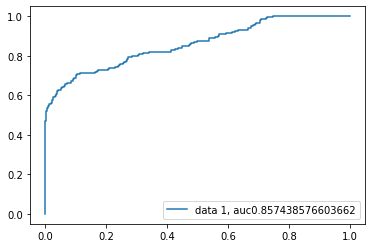

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

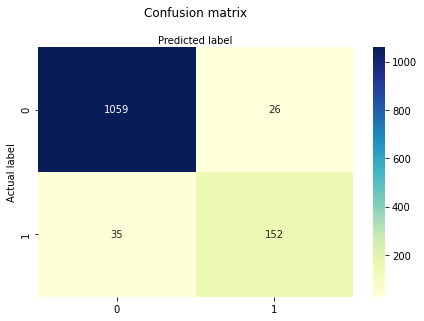

Accuracy: 0.9520440251572327
Precision: 0.8539325842696629
Recall: 0.8128342245989305


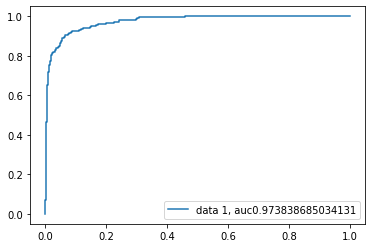

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

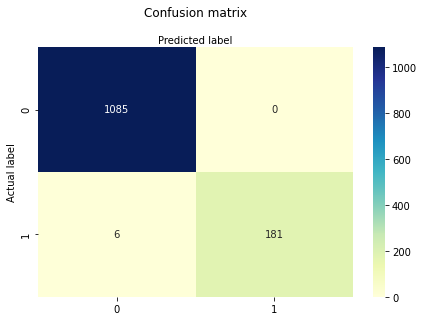

Accuracy: 0.9952830188679245
Precision: 1.0
Recall: 0.9679144385026738


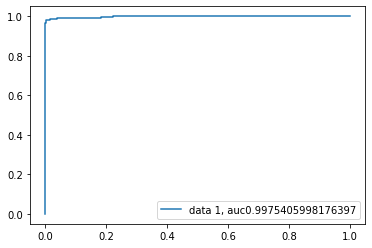

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


for i in range(1,11):
    data5 = pd.read_csv('framingham.csv')
    data5["new_column_weights"] = 1
    data5.loc[data5["TenYearCHD"] == 1,"new_column_weights"] = 1.5 + (i/100)
    data5.loc[data5["TenYearCHD"] == 0,"new_column_weights"] = 1


    for column in data5.columns:
        data5[column].fillna(data[column].mode()[0], inplace=True)

    print(data5.head(5))


    labels = ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
    data5["age_bins"] = pd.cut(data5.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

    print(data5.head(5))

    print(data5["TenYearCHD"].value_counts())
    import numpy as np


    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn import svm


    feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                    'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose',"new_column_weights"]

    X = data5[feature_cols] # Features
    y = data5.TenYearCHD # Target variable

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression()

    logreg.fit(X_train, y_train, sample_weight= X_train["new_column_weights"])
    y_pred = logreg.predict(X_test)

    # svmd = svm.SVC(kernel='linear',probability= True)

    # svmd.fit(X_train, y_train)
    # y_pred = svmd.predict(X_test)

    from sklearn import metrics

    dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(dtf_matrix)

    # also need to visualise the confusion matrix using a Heatmap

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_names = [0,1]
    fix, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

    # precision means when a model makes a prediction, how often it is correct.
    # when my model predicts patients are going to suffer from diabetes, it was correct
    # 76% of the time.

    y_prob = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

    auc = metrics.roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
    plt.legend(loc=4)
    plt.show()

After looking at this data, I have decided to have my weight at 1.52 in order to try and get a fair outcome. I have just realised that although this has helped me gain much better results in comparison to other models such as the one in the paper, it does not allow me to look into fully mitigating the biases I have explored previously, and so have decided to change my method to sampling the data instead.However, this data managed to potentially overfit on the data we have currently. 

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  new_column_weights  
0           0 

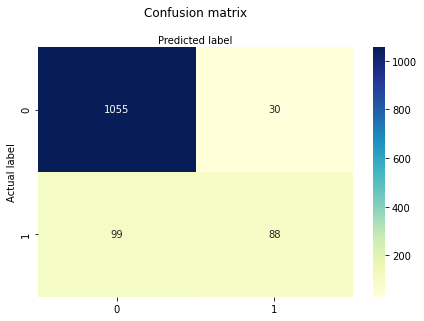

Accuracy: 0.8985849056603774
Precision: 0.7457627118644068
Recall: 0.47058823529411764


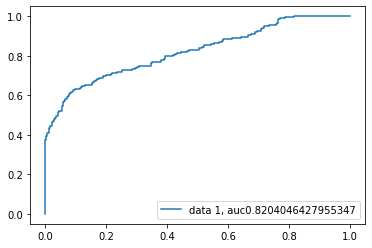

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[[1036   28]
 [  89  119]]


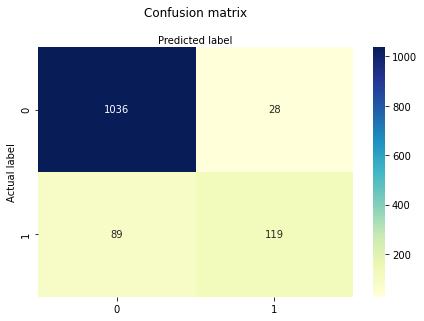

Accuracy: 0.9080188679245284
Precision: 0.8095238095238095
Recall: 0.5721153846153846


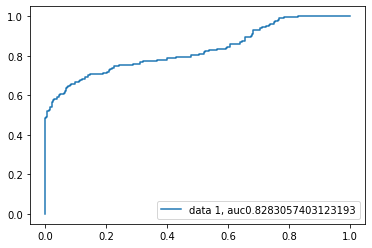

In [ ]:
def building_a_fair_subset(data):
    ages = ["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0, 1]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)

    #for CHD_option in TenYearCHD:
    #data3 = data.copy()
    #data3.loc[data3["TenYearCHD"] != CHD_option, "TenYearCHD"] = np.NaN
    #data3 = data3[data3.TenYearCHD.notnull()]

    for gender_option in genders:
        data4 = data.copy()
        data4.loc[data4["male"] != gender_option, "male"] = np.NaN
        data4 = data4[data4.male.notnull()]

        for smoker_option in currentSmokers:
            data5 = data4.copy()
            data5.loc[data5["currentSmoker"] != smoker_option, "currentSmoker"] = np.NaN
            data5 = data5[data5.currentSmoker.notnull()]

            for age in ages:
                data6 = data5.copy()
                data6.loc[data6["age_bins"] != age, "age_bins"] = np.NaN
                data6 = data6[data6.age_bins.notnull()]
                if len(data6.index) != 0:
                    if count == 0:
                        data7 = data6.sample(n=265, replace=True, random_state=1)
                        count +=1

                    else:
                        data8 = data6.sample(n=265, replace=True, random_state=1)
                        data7 = data7.append(data8)


    print(data7)
    return data7

data = pd.read_csv('framingham.csv')
data["new_column_weights"] = 1
data.loc[data["TenYearCHD"] == 1,"new_column_weights"] = 1.52
data.loc[data["TenYearCHD"] == 0,"new_column_weights"] = 1


for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print(data.head(5))


labels = ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

print(data.head(5))

print(data["TenYearCHD"].value_counts())
import numpy as np

data2 = building_a_fair_subset(data)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm


feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose',"new_column_weights"]


def prediction_on_two_datasets(data,key):
    X = data[feature_cols] # Features
    y = data.TenYearCHD # Target variable

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

    if key == 1:
        X = data2[feature_cols] # Features
        y = data2.TenYearCHD # Target variable
        X_train2,X_test,y_train2,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression()

    logreg.fit(X_train, y_train, sample_weight= X_train["new_column_weights"])
    y_pred = logreg.predict(X_test)

    from sklearn import metrics

    dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(dtf_matrix)

    # also need to visualise the confusion matrix using a Heatmap

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_names = [0,1]
    fix, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

    # precision means when a model makes a prediction, how often it is correct.
    # when my model predicts patients are going to suffer from diabetes, it was correct
    # 76% of the time.

    y_prob = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

    auc = metrics.roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
    plt.legend(loc=4)
    plt.show()

prediction_on_two_datasets(data,0)
prediction_on_two_datasets(data,1)



It is clear when we run our fair dataset in comparison with our real one, we again end up getting better results. I believe this is because when we reweight the target variable, this removes the initial bias of predicting positive every time. By then testing on a fair dataset rather than a skewed one, it gets us better results. However after doing this, I have realised the initial demographic biases we have suspected in the original dataset may have changed. Although this has resolved bias within the initial dataset, I don't think it has solved bias within the demographic groups, and through only resolving the bias inprocessing with the algorithm, it may mean that the demographic group biases may change rather than be resolved. E.g. If all of the patients that have CHD are male, and CHD patients are reweighed, than the system adds weight onto these as they are the "minority group" in terms of the skewed target variable, they the algorithm will still lean towards males and may infact bias them even more. Although our results in accuracy have improved, even in comparison with the research paper, I believe the bias still stands. Instead, we will reweight the data, check that the distributions in bias are still similar to before, and then resolve the demographic group bias instead. 

## Resampling the Target Variable Take 2
We are instead going to resample the target variable for 0 and 1 for the outcome in 5 different ratios and look at the resutls: 
    
    90:10   
    80:20
    70:30
    60:40
    50:50

(4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
No

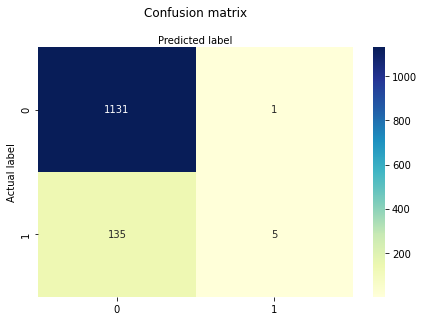

Accuracy: 0.8930817610062893
Precision: 0.8333333333333334
Recall: 0.03571428571428571


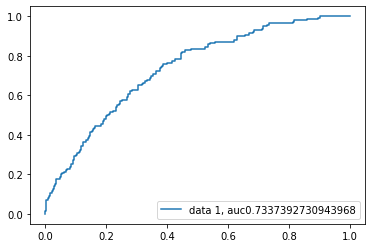

male                   0
age                   46
education            3.0
currentSmoker          0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol            190.0
sysBP              128.0
diaBP               74.0
BMI                23.01
heartRate           95.0
glucose             78.0
TenYearCHD           0.0
age_bins           40-49
Name: 1267, dtype: object
[[979  25]
 [228  40]]


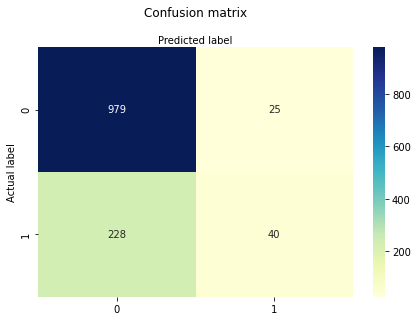

Accuracy: 0.8011006289308176
Precision: 0.6153846153846154
Recall: 0.14925373134328357


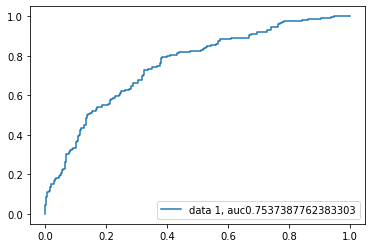

male                   1
age                   56
education            1.0
currentSmoker          0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol            220.0
sysBP              113.0
diaBP               83.0
BMI                25.12
heartRate           58.0
glucose             86.0
TenYearCHD           0.0
age_bins           50-59
Name: 2942, dtype: object
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
[[811  63]
 [269 129]]


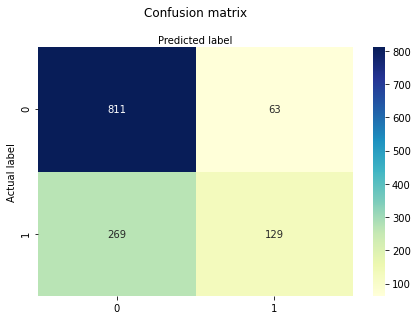

Accuracy: 0.7389937106918238
Precision: 0.671875
Recall: 0.3241206030150754


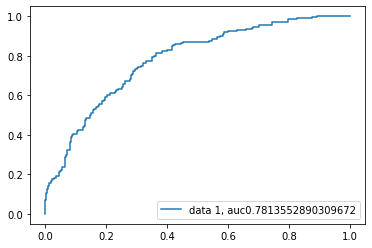

male                   0
age                   61
education            1.0
currentSmoker          0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol            220.0
sysBP              142.0
diaBP               93.0
BMI                23.37
heartRate           80.0
glucose             79.0
TenYearCHD           0.0
age_bins           60-69
Name: 151, dtype: object
[[609 135]
 [269 259]]


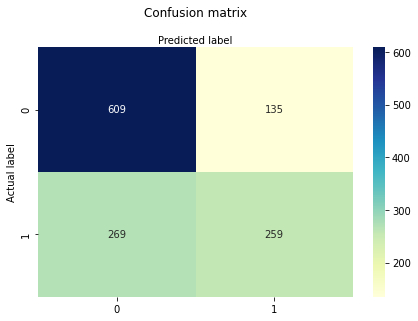

Accuracy: 0.6823899371069182
Precision: 0.6573604060913706
Recall: 0.49053030303030304


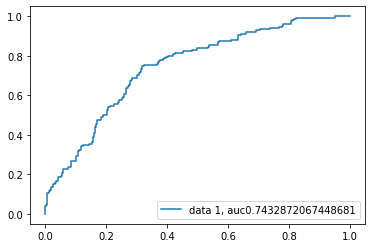

male                   1
age                   46
education            1.0
currentSmoker          1
cigsPerDay          30.0
BPMeds               0.0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol            270.0
sysBP              131.0
diaBP               81.0
BMI                 26.4
heartRate           75.0
glucose             83.0
TenYearCHD           0.0
age_bins           40-49
Name: 135, dtype: object
[[445 196]
 [165 466]]


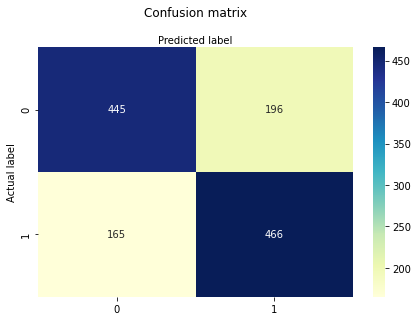

Accuracy: 0.7161949685534591
Precision: 0.7039274924471299
Recall: 0.7385103011093502


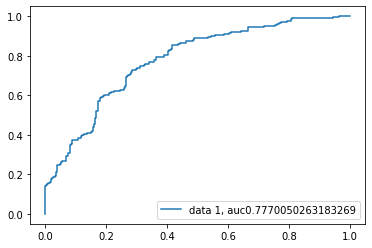

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('framingham.csv')
print(data.shape)
print(data.info())
print(data.isnull().values.any())


# maybe we shouldn't do it for rescaling.


def building_a_fair_subset(data, percentage):
    ages = ["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0, 1]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)

    for CHD_option in TenYearCHD:
        data3 = data.copy()
        data3.loc[data3["TenYearCHD"] != CHD_option, "TenYearCHD"] = np.NaN
        data3 = data3[data3.TenYearCHD.notnull()]

        if count == 0:
            data7 = data3.sample(n=percentage, replace=True, random_state=1)
            count +=1

        else:
            data8 = data3.sample(n=4240 - percentage, replace=True, random_state=1)
            data7 = data7.append(data8)

    return data7

# we will sample the data for 90 % to 50 % and look at the results. 
for i in range(9, 4, -1):
    percentage = int(4240 * i/10)
    data = building_a_fair_subset(data,percentage)


    for column in data.columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    labels = ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
    data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])


    import numpy as np
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split

    feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                    'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

    X = data[feature_cols] # Features
    y = data.TenYearCHD # Target variable

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression(solver='newton-cg')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)


    from sklearn import metrics

    dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(dtf_matrix)

    # also need to visualise the confusion matrix using a Heatmap

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_names = [0,1]
    fix, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

    # precision means when a model makes a prediction, how often it is correct.
    # when my model predicts patients are going to suffer from diabetes, it was correct
    # 76% of the time.

    y_prob = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

    auc = metrics.roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
    plt.legend(loc=4)
    plt.show()

We can see that through resampling, our accuracy begins to decrease by quite a bit, as does our precision but our recall inceases as we predict more correct true positives and less true negatives which is what we want. I think choosing a 50% split, although means we have an accuracy of 71% to work with, will mean that we won't have the bias of an unbalanced target variable, as it meets the demographic parity requirement. Furthermore, by decreasing the number of false negatives is another aim of ours. We can now try and work with this dataset to try and find and resolve demographic bias which was one of ours aims within this project.  

# Part 3 continued: Working with the new, balanced dataset
I am now going to look at the distributions within the new dataset and see if all of the bias's from beforehand have remained. This will be a new section in my project report after "Balancing the Target Variable". 

(4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
No

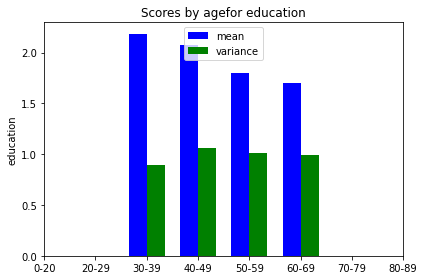

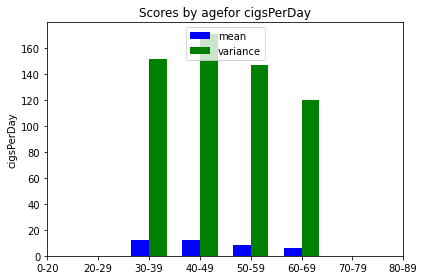

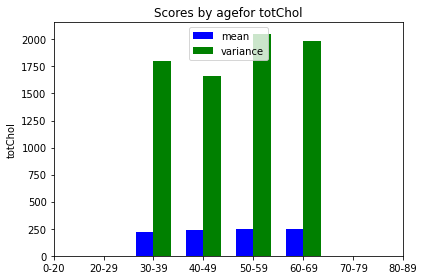

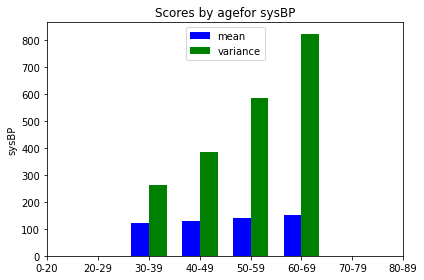

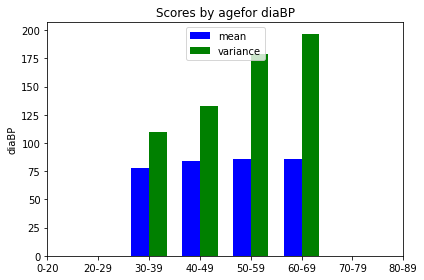

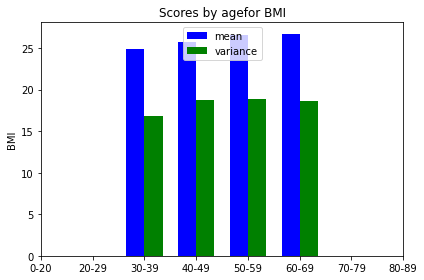

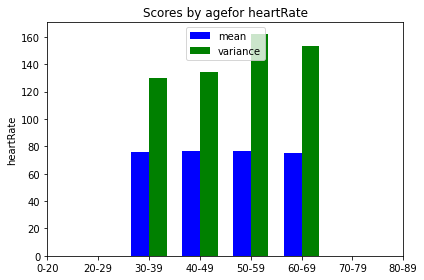

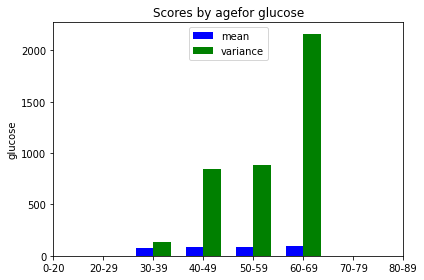

male
Series([], Name: male, dtype: int64)
Series([], Name: male, dtype: int64)
0    281
1    240
Name: male, dtype: int64
1    723
0    697
Name: male, dtype: int64
0    788
1    683
Name: male, dtype: int64
0    465
1    363
Name: male, dtype: int64
Series([], Name: male, dtype: int64)
Series([], Name: male, dtype: int64)


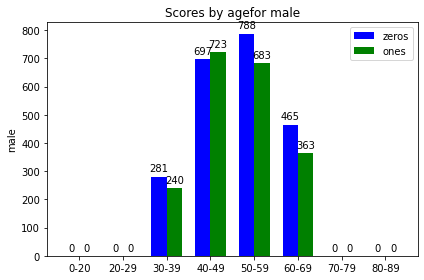

currentSmoker
Series([], Name: currentSmoker, dtype: int64)
Series([], Name: currentSmoker, dtype: int64)
1    340
0    181
Name: currentSmoker, dtype: int64
1    883
0    537
Name: currentSmoker, dtype: int64
0    815
1    656
Name: currentSmoker, dtype: int64
0    554
1    274
Name: currentSmoker, dtype: int64
Series([], Name: currentSmoker, dtype: int64)
Series([], Name: currentSmoker, dtype: int64)


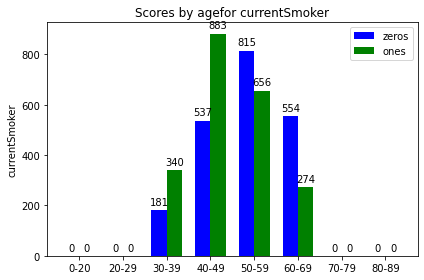

BPMeds
Series([], Name: BPMeds, dtype: int64)
Series([], Name: BPMeds, dtype: int64)
0.0    516
1.0      5
Name: BPMeds, dtype: int64
0.000000    1352
1.000000      45
0.029615      23
Name: BPMeds, dtype: int64
0.000000    1356
1.000000      87
0.029615      28
Name: BPMeds, dtype: int64
0.000000    753
1.000000     64
0.029615     11
Name: BPMeds, dtype: int64
Series([], Name: BPMeds, dtype: int64)
Series([], Name: BPMeds, dtype: int64)


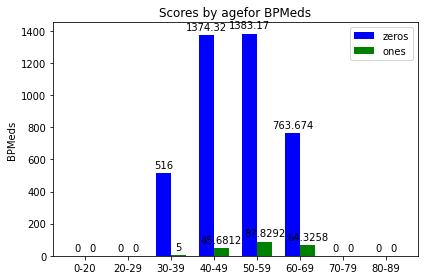

prevalentStroke
Series([], Name: prevalentStroke, dtype: int64)
Series([], Name: prevalentStroke, dtype: int64)
0    521
Name: prevalentStroke, dtype: int64
0    1419
1       1
Name: prevalentStroke, dtype: int64
0    1453
1      18
Name: prevalentStroke, dtype: int64
0    815
1     13
Name: prevalentStroke, dtype: int64
Series([], Name: prevalentStroke, dtype: int64)
Series([], Name: prevalentStroke, dtype: int64)


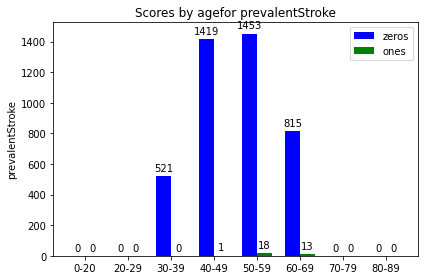

prevalentHyp
Series([], Name: prevalentHyp, dtype: int64)
Series([], Name: prevalentHyp, dtype: int64)
0    462
1     59
Name: prevalentHyp, dtype: int64
0    983
1    437
Name: prevalentHyp, dtype: int64
0    825
1    646
Name: prevalentHyp, dtype: int64
1    484
0    344
Name: prevalentHyp, dtype: int64
Series([], Name: prevalentHyp, dtype: int64)
Series([], Name: prevalentHyp, dtype: int64)


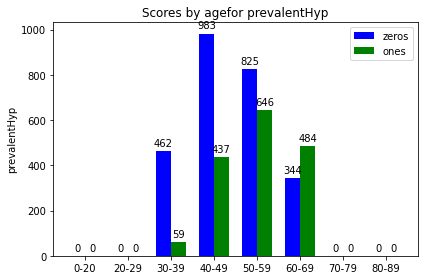

diabetes
Series([], Name: diabetes, dtype: int64)
Series([], Name: diabetes, dtype: int64)
0    517
1      4
Name: diabetes, dtype: int64
0    1371
1      49
Name: diabetes, dtype: int64
0    1409
1      62
Name: diabetes, dtype: int64
0    764
1     64
Name: diabetes, dtype: int64
Series([], Name: diabetes, dtype: int64)
Series([], Name: diabetes, dtype: int64)


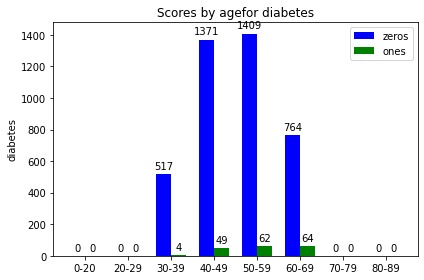

TenYearCHD
Series([], Name: TenYearCHD, dtype: int64)
Series([], Name: TenYearCHD, dtype: int64)
0.0    413
1.0    108
Name: TenYearCHD, dtype: int64
0.0    856
1.0    564
Name: TenYearCHD, dtype: int64
1.0    861
0.0    610
Name: TenYearCHD, dtype: int64
1.0    587
0.0    241
Name: TenYearCHD, dtype: int64
Series([], Name: TenYearCHD, dtype: int64)
Series([], Name: TenYearCHD, dtype: int64)


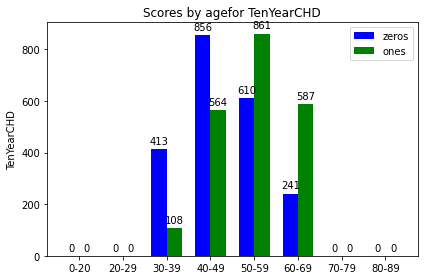

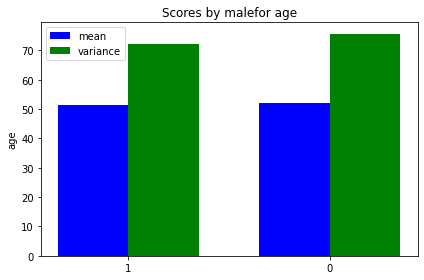

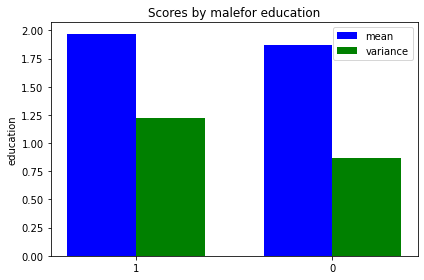

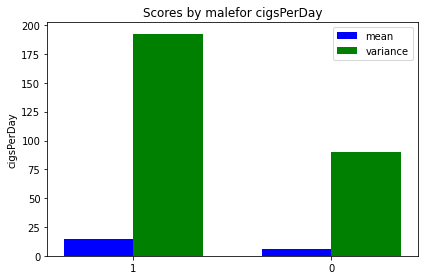

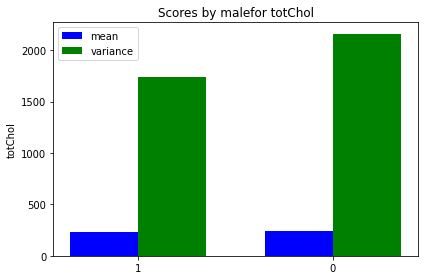

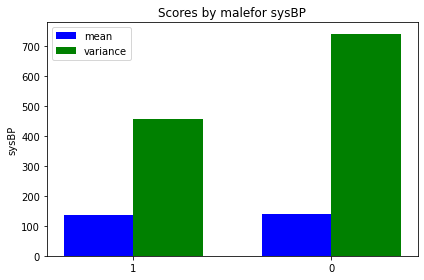

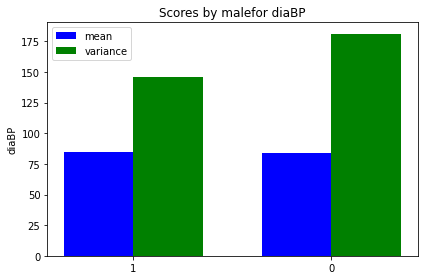

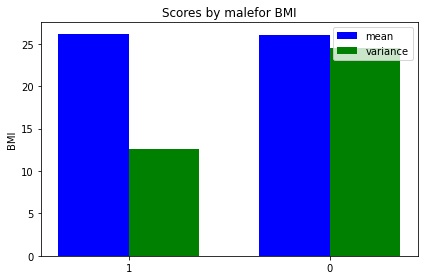

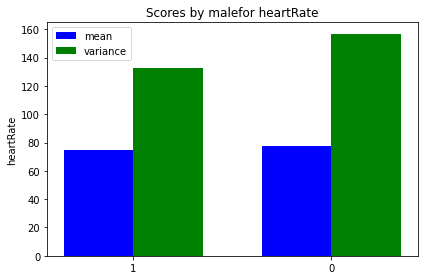

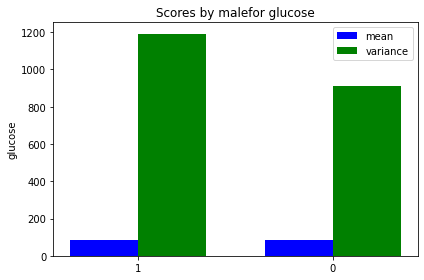

currentSmoker
1    1291
0     718
Name: currentSmoker, dtype: int64
0    1369
1     862
Name: currentSmoker, dtype: int64


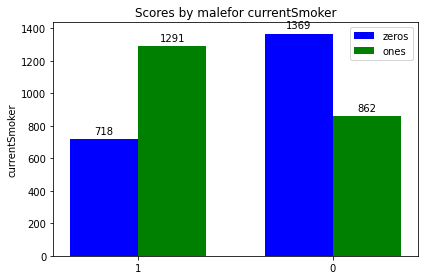

BPMeds
0.000000    1938
1.000000      52
0.029615      19
Name: BPMeds, dtype: int64
0.000000    2039
1.000000     149
0.029615      43
Name: BPMeds, dtype: int64


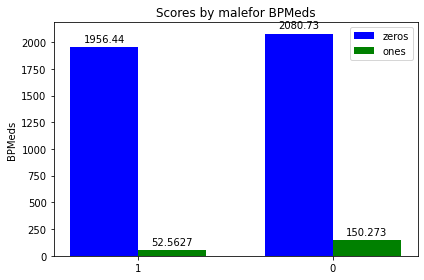

prevalentStroke
0    1997
1      12
Name: prevalentStroke, dtype: int64
0    2211
1      20
Name: prevalentStroke, dtype: int64


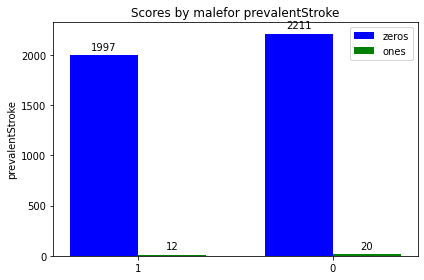

prevalentHyp
0    1304
1     705
Name: prevalentHyp, dtype: int64
0    1310
1     921
Name: prevalentHyp, dtype: int64


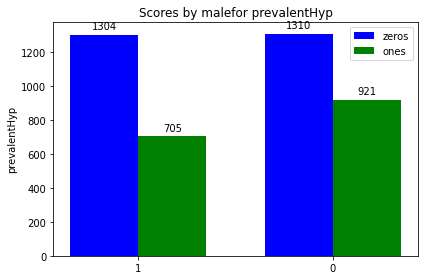

diabetes
0    1902
1     107
Name: diabetes, dtype: int64
0    2159
1      72
Name: diabetes, dtype: int64


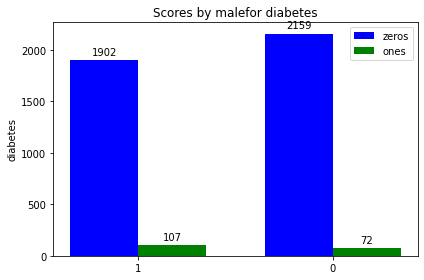

TenYearCHD
1.0    1100
0.0     909
Name: TenYearCHD, dtype: int64
0.0    1211
1.0    1020
Name: TenYearCHD, dtype: int64


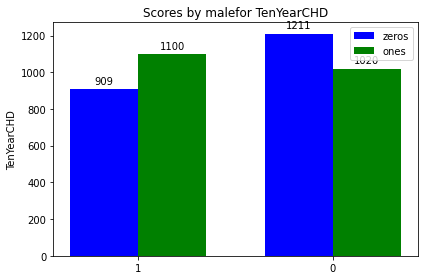

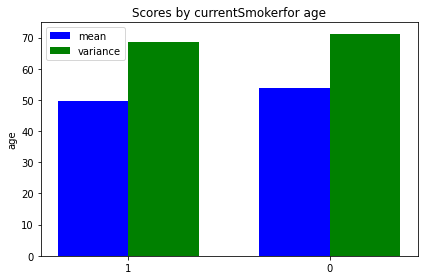

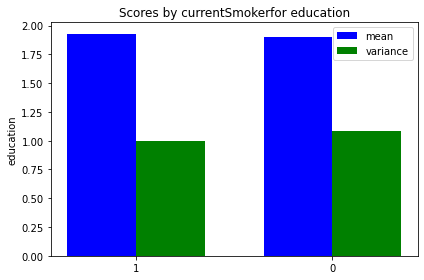

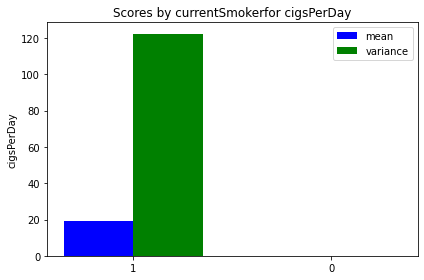

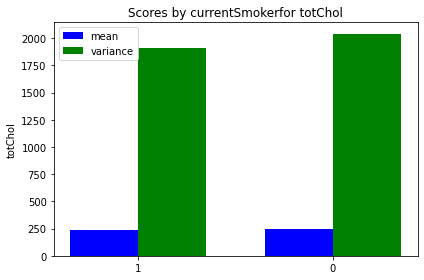

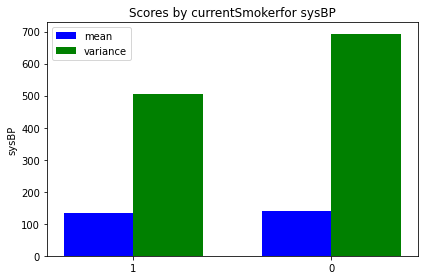

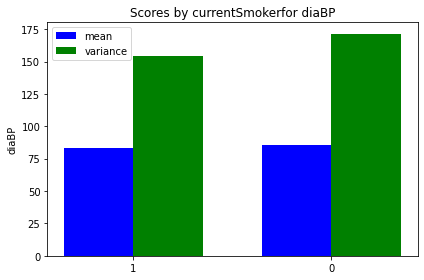

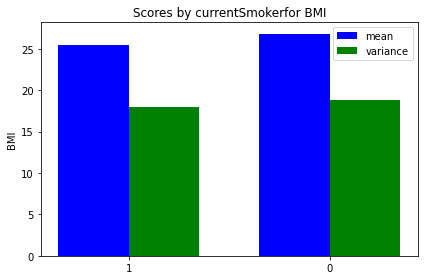

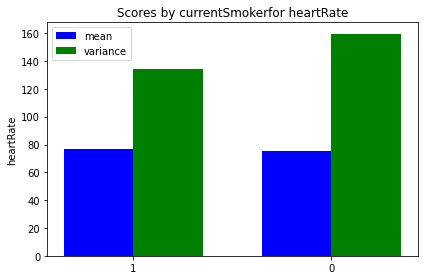

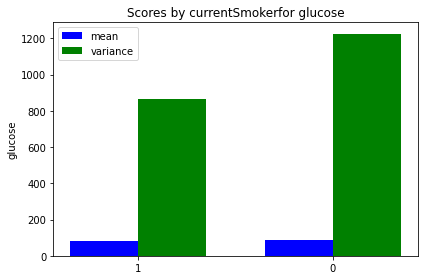

male
1    1291
0     862
Name: male, dtype: int64
0    1369
1     718
Name: male, dtype: int64


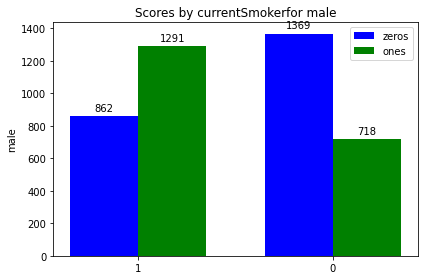

BPMeds
0.000000    2058
1.000000      64
0.029615      31
Name: BPMeds, dtype: int64
0.000000    1919
1.000000     137
0.029615      31
Name: BPMeds, dtype: int64


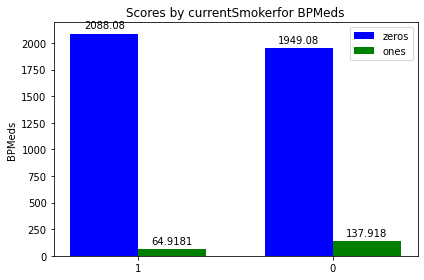

prevalentStroke
0    2140
1      13
Name: prevalentStroke, dtype: int64
0    2068
1      19
Name: prevalentStroke, dtype: int64


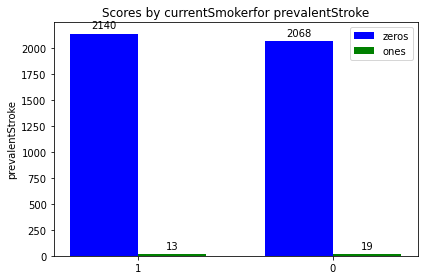

prevalentHyp
0    1468
1     685
Name: prevalentHyp, dtype: int64
0    1146
1     941
Name: prevalentHyp, dtype: int64


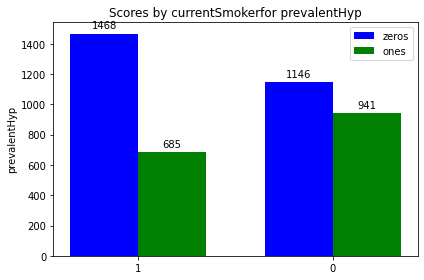

diabetes
0    2081
1      72
Name: diabetes, dtype: int64
0    1980
1     107
Name: diabetes, dtype: int64


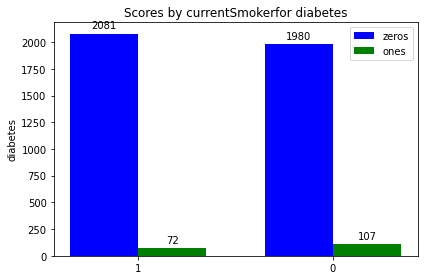

TenYearCHD
1.0    1094
0.0    1059
Name: TenYearCHD, dtype: int64
0.0    1061
1.0    1026
Name: TenYearCHD, dtype: int64


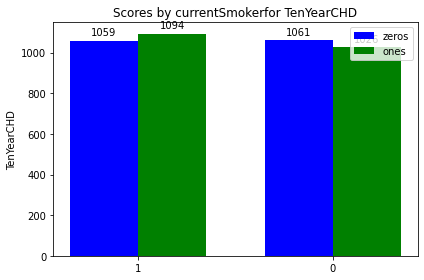

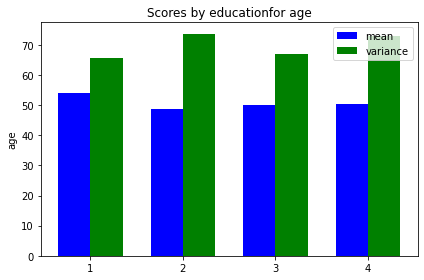

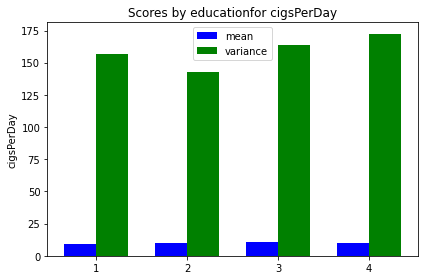

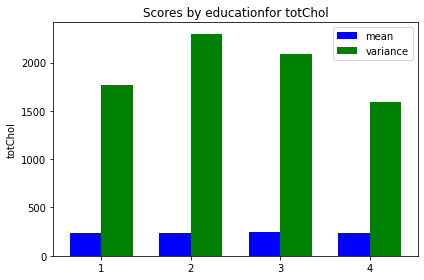

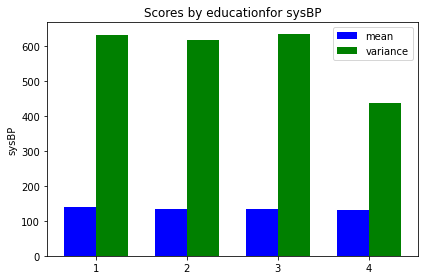

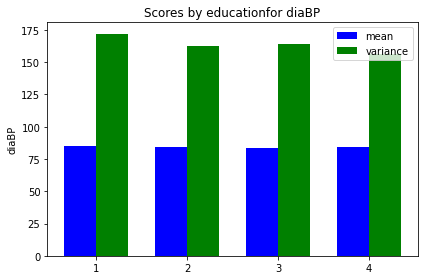

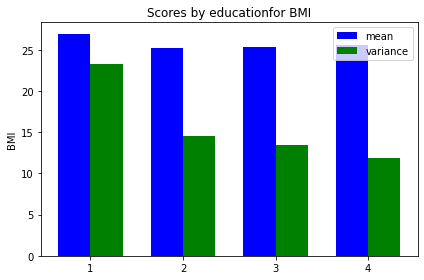

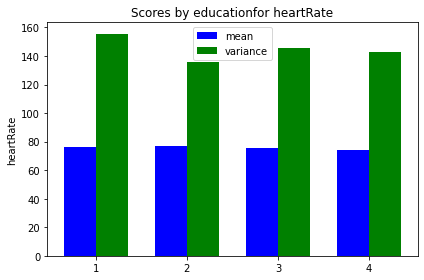

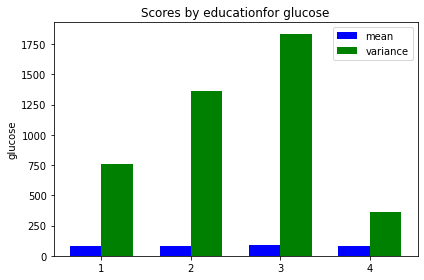

male
0    974
1    937
Name: male, dtype: int64
0    693
1    441
Name: male, dtype: int64
0    374
1    236
Name: male, dtype: int64
1    323
0    156
Name: male, dtype: int64


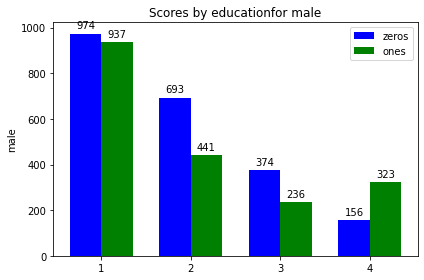

currentSmoker
0    988
1    923
Name: currentSmoker, dtype: int64
1    620
0    514
Name: currentSmoker, dtype: int64
1    319
0    291
Name: currentSmoker, dtype: int64
0    250
1    229
Name: currentSmoker, dtype: int64


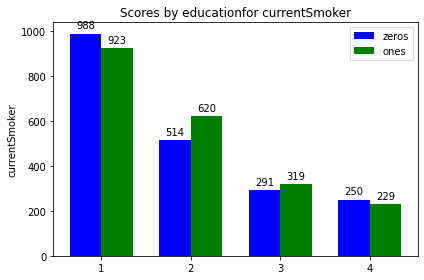

BPMeds
0.000000    1784
1.000000      99
0.029615      28
Name: BPMeds, dtype: int64
0.000000    1068
1.000000      55
0.029615      11
Name: BPMeds, dtype: int64
0.000000    576
1.000000     23
0.029615     11
Name: BPMeds, dtype: int64
0.000000    444
1.000000     23
0.029615     12
Name: BPMeds, dtype: int64


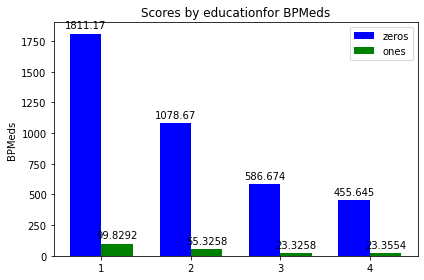

prevalentStroke
0    1883
1      28
Name: prevalentStroke, dtype: int64
0    1130
1       4
Name: prevalentStroke, dtype: int64
0    610
Name: prevalentStroke, dtype: int64
0    479
Name: prevalentStroke, dtype: int64


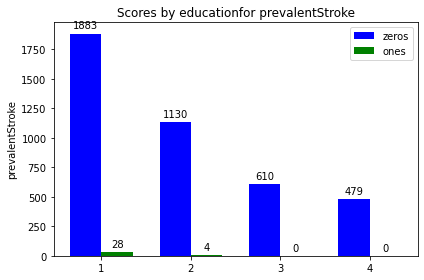

prevalentHyp
0    1072
1     839
Name: prevalentHyp, dtype: int64
0    750
1    384
Name: prevalentHyp, dtype: int64
0    411
1    199
Name: prevalentHyp, dtype: int64
0    307
1    172
Name: prevalentHyp, dtype: int64


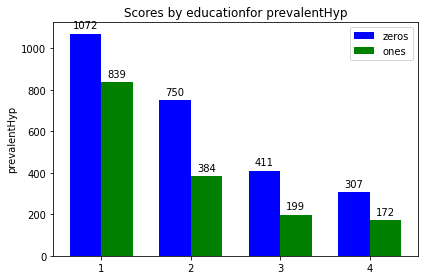

diabetes
0    1816
1      95
Name: diabetes, dtype: int64
0    1096
1      38
Name: diabetes, dtype: int64
0    585
1     25
Name: diabetes, dtype: int64
0    465
1     14
Name: diabetes, dtype: int64


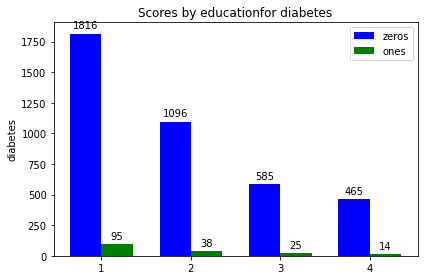

TenYearCHD
1.0    1073
0.0     838
Name: TenYearCHD, dtype: int64
0.0    658
1.0    476
Name: TenYearCHD, dtype: int64
0.0    329
1.0    281
Name: TenYearCHD, dtype: int64
0.0    242
1.0    237
Name: TenYearCHD, dtype: int64


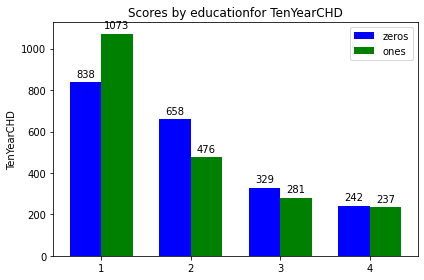

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('framingham.csv')
print(data.shape)
print(data.info())
print(data.isnull().values.any())


# maybe we shouldn't do it for rescaling.

for column in data.columns:
    data[column].fillna(data[column].mean(), inplace=True)


def building_a_fair_subset(data, percentage):
    ages = ["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0, 1]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)

    for CHD_option in TenYearCHD:
        data3 = data.copy()
        data3.loc[data3["TenYearCHD"] != CHD_option, "TenYearCHD"] = np.NaN
        data3 = data3[data3.TenYearCHD.notnull()]

        if count == 0:
            data7 = data3.sample(n=percentage, replace=True, random_state=1)
            count +=1

        else:
            data8 = data3.sample(n=4240 - percentage, replace=True, random_state=1)
            data7 = data7.append(data8)
    
    return data7

data = building_a_fair_subset(data, 2120)

def demographic_groups_split(demographic_group, feature_concerned):

    numeric_features = ["age", "education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
    categoric_features = ["male", "currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"]


    for feature in numeric_features:
        if feature != feature_concerned:
            if feature_concerned == "age":
                data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

            table = []
            variance = []
            
            for category in demographic_group:
                data2 = data.copy()
                data2["temp"] = 1
                if feature_concerned == "age":
                    data2.loc[data2["age_bins"] != category, "temp"] = np.NaN

                else:
                    data2.loc[data2[feature_concerned] != category, "temp"] = np.NaN

                data2 = data2[data2.temp.notnull()]    
                if data2[feature].mean() == np.NaN:
                    table.append("0")
                    
                else:
                    table.append(data2[feature].mean())

                if data2[feature].var() == np.NaN:
                    variance.append("0")       

                else:
                    variance.append(data2[feature].var())

            X = np.arange(len(demographic_group))
            width = 0.35  # the width of the bar
            fig, ax = plt.subplots()
            bar1 = ax.bar(X - width/2, table, color = 'b',width= 0.35, label= 'mean')
            bar2 = ax.bar(X + width/2, variance, color = 'g',width= 0.35, label= 'variance')

            ax.set_ylabel(feature)
            ax.set_title('Scores by ' + str(feature_concerned) + 'for ' + str(feature))
            ax.set_xticks(X)
            ax.set_xticklabels(demographic_group)
            ax.legend()

            fig.tight_layout()

            plt.show()
            
    for feature2 in categoric_features:
        if feature2 != feature_concerned:
            print(feature2)
            if feature_concerned == "age":
                data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

            ones = []
            zeros = []

            for category in demographic_group:
                data3 = data.copy()
                data3["temp"] = 1
                if feature_concerned == "age":
                    data3.loc[data3["age_bins"] != category, "temp"] = np.NaN

                else:
                    data3.loc[data3[feature_concerned] != category, "temp"] = np.NaN

                data3 = data3[data3.temp.notnull()]    
                print(data3[feature2].value_counts())

                zeros.append(len(data3.index) - data3[feature2].sum())
                ones.append(data3[feature2].sum())

            X = np.arange(len(demographic_group))
            width = 0.35  # the width of the bar
            fig, ax = plt.subplots()
            bar1 = ax.bar(X - width/2, zeros, color = 'b', width= 0.35, label= 'zeros')
            bar2 = ax.bar(X + width/2, ones, color = 'g', width= 0.35, label= 'ones')

            ax.set_ylabel(feature2)
            ax.set_title('Scores by ' + str(feature_concerned) + 'for ' + str(feature2))
            ax.set_xticks(X)
            ax.set_xticklabels(demographic_group)
            ax.legend()
            ax.bar_label(bar1, padding=3)
            ax.bar_label(bar2, padding=3)
            fig.tight_layout()

            plt.show()

demographic_groups_split(["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"], "age")
demographic_groups_split([1,0], "male")
demographic_groups_split([1,0], "currentSmoker")
demographic_groups_split([1,2,3,4],"education")

All of the distributions were either similar, or showed more bias than the previous dataset. This is arguably justifiable as it allows us to show the effects of mitigating the bias more easily. However one distribution in the dataset did change, which was the fact that we had a big decrease in the proportion of women in the 30-39 age range. We will add 100 samples meeting this criteria into the dataset, 50 for each outcome, and display the relationships to make sure all bias's have remained consistent in the dataset. 

4240
male                   0
age                   46
education            3.0
currentSmoker          0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol            190.0
sysBP              128.0
diaBP               74.0
BMI                23.01
heartRate           95.0
glucose             78.0
TenYearCHD           0.0
age_bins           40-49
Name: 1267, dtype: object
4340


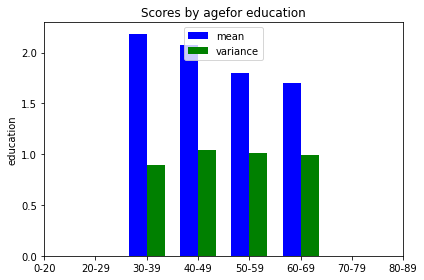

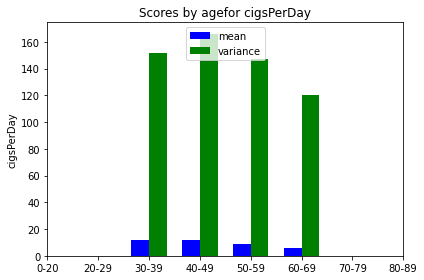

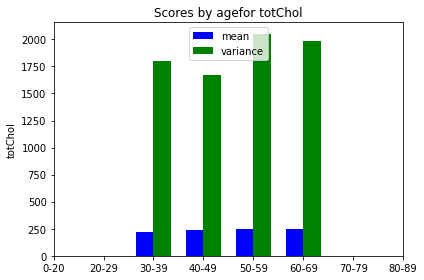

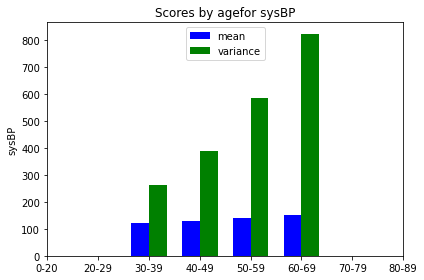

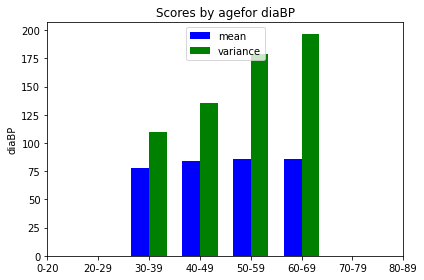

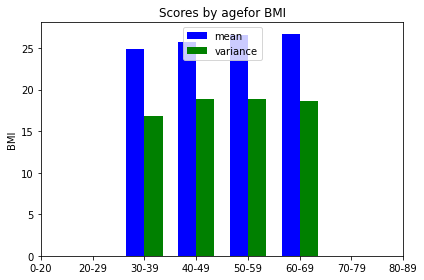

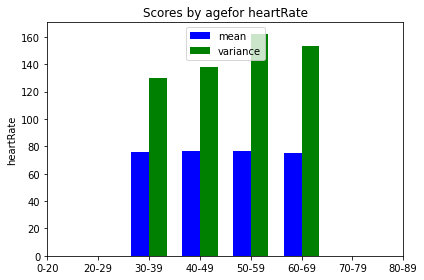

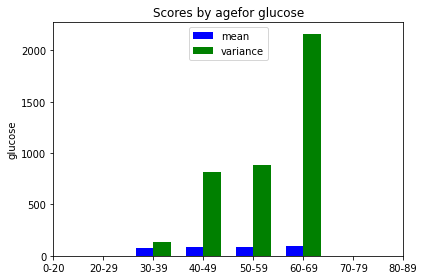

male
Series([], Name: male, dtype: int64)
Series([], Name: male, dtype: int64)
0.0    281
1.0    240
Name: male, dtype: int64
0.0    797
1.0    723
Name: male, dtype: int64
0.0    788
1.0    683
Name: male, dtype: int64
0.0    465
1.0    363
Name: male, dtype: int64
Series([], Name: male, dtype: int64)
Series([], Name: male, dtype: int64)


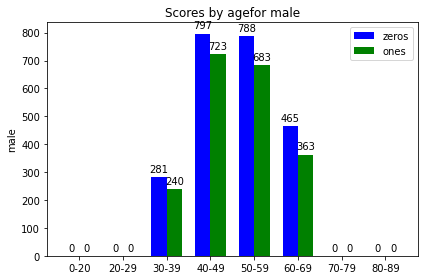

currentSmoker
Series([], Name: currentSmoker, dtype: int64)
Series([], Name: currentSmoker, dtype: int64)
1.0    340
0.0    181
Name: currentSmoker, dtype: int64
1.0    940
0.0    580
Name: currentSmoker, dtype: int64
0.0    815
1.0    656
Name: currentSmoker, dtype: int64
0.0    554
1.0    274
Name: currentSmoker, dtype: int64
Series([], Name: currentSmoker, dtype: int64)
Series([], Name: currentSmoker, dtype: int64)


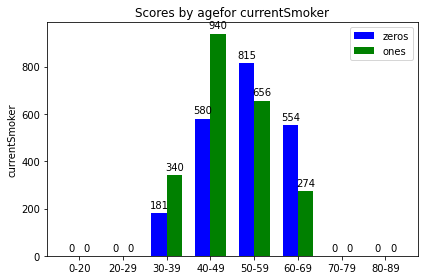

BPMeds
Series([], Name: BPMeds, dtype: int64)
Series([], Name: BPMeds, dtype: int64)
0.0    516
1.0      5
Name: BPMeds, dtype: int64
0.000000    1447
1.000000      50
0.029615      23
Name: BPMeds, dtype: int64
0.000000    1356
1.000000      87
0.029615      28
Name: BPMeds, dtype: int64
0.000000    753
1.000000     64
0.029615     11
Name: BPMeds, dtype: int64
Series([], Name: BPMeds, dtype: int64)
Series([], Name: BPMeds, dtype: int64)


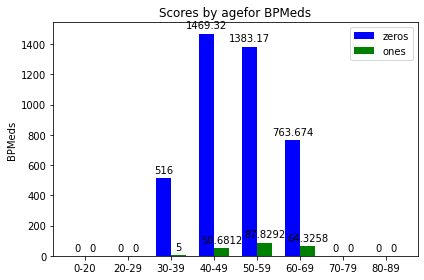

prevalentStroke
Series([], Name: prevalentStroke, dtype: int64)
Series([], Name: prevalentStroke, dtype: int64)
0.0    521
Name: prevalentStroke, dtype: int64
0.0    1519
1.0       1
Name: prevalentStroke, dtype: int64
0.0    1453
1.0      18
Name: prevalentStroke, dtype: int64
0.0    815
1.0     13
Name: prevalentStroke, dtype: int64
Series([], Name: prevalentStroke, dtype: int64)
Series([], Name: prevalentStroke, dtype: int64)


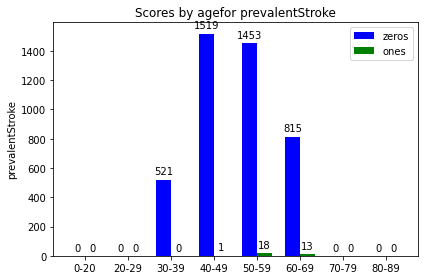

prevalentHyp
Series([], Name: prevalentHyp, dtype: int64)
Series([], Name: prevalentHyp, dtype: int64)
0.0    462
1.0     59
Name: prevalentHyp, dtype: int64
0.0    1054
1.0     466
Name: prevalentHyp, dtype: int64
0.0    825
1.0    646
Name: prevalentHyp, dtype: int64
1.0    484
0.0    344
Name: prevalentHyp, dtype: int64
Series([], Name: prevalentHyp, dtype: int64)
Series([], Name: prevalentHyp, dtype: int64)


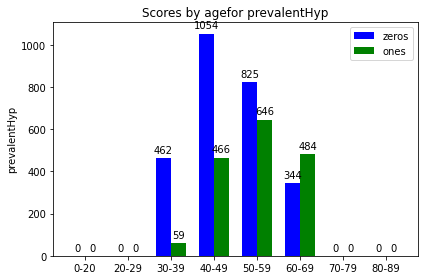

diabetes
Series([], Name: diabetes, dtype: int64)
Series([], Name: diabetes, dtype: int64)
0.0    517
1.0      4
Name: diabetes, dtype: int64
0.0    1465
1.0      55
Name: diabetes, dtype: int64
0.0    1409
1.0      62
Name: diabetes, dtype: int64
0.0    764
1.0     64
Name: diabetes, dtype: int64
Series([], Name: diabetes, dtype: int64)
Series([], Name: diabetes, dtype: int64)


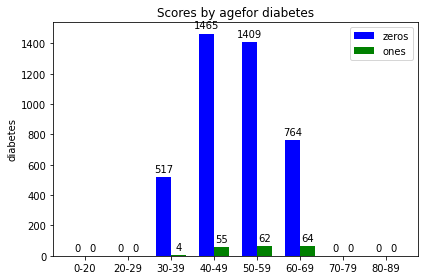

TenYearCHD
Series([], Name: TenYearCHD, dtype: int64)
Series([], Name: TenYearCHD, dtype: int64)
0.0    413
1.0    108
Name: TenYearCHD, dtype: int64
0.0    906
1.0    614
Name: TenYearCHD, dtype: int64
1.0    861
0.0    610
Name: TenYearCHD, dtype: int64
1.0    587
0.0    241
Name: TenYearCHD, dtype: int64
Series([], Name: TenYearCHD, dtype: int64)
Series([], Name: TenYearCHD, dtype: int64)


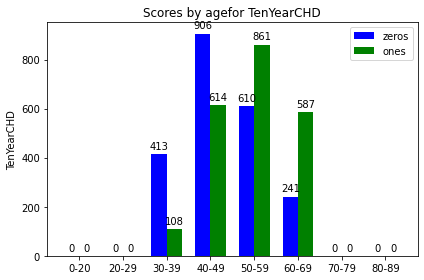

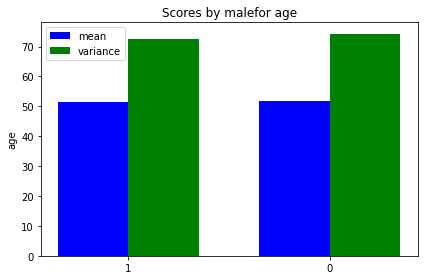

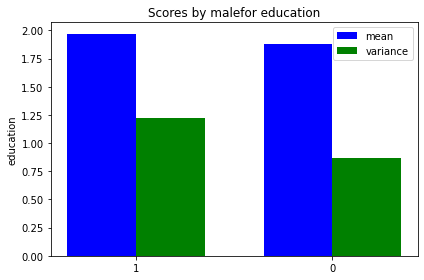

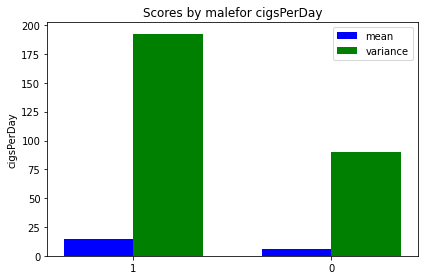

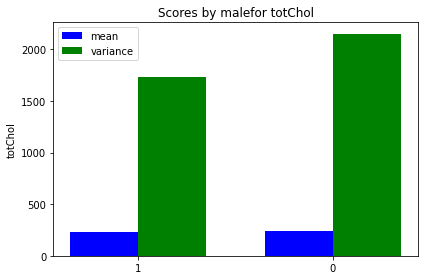

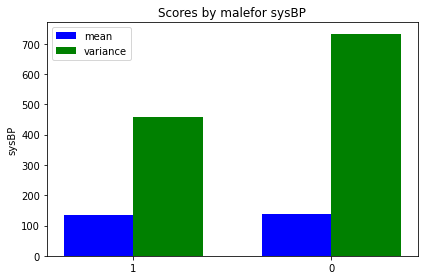

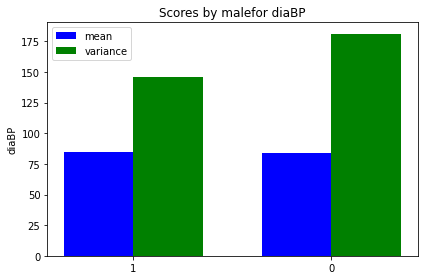

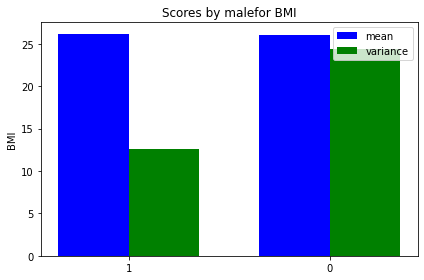

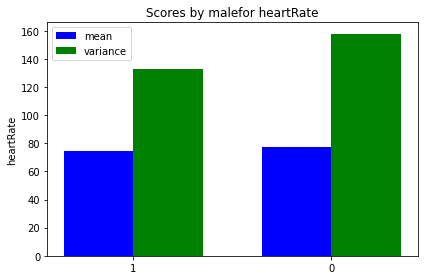

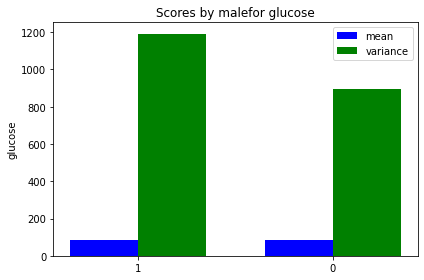

currentSmoker
1.0    1291
0.0     718
Name: currentSmoker, dtype: int64
0.0    1412
1.0     919
Name: currentSmoker, dtype: int64


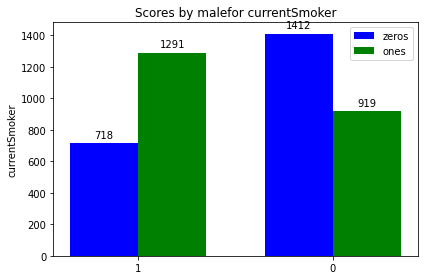

BPMeds
0.000000    1938
1.000000      52
0.029615      19
Name: BPMeds, dtype: int64
0.000000    2134
1.000000     154
0.029615      43
Name: BPMeds, dtype: int64


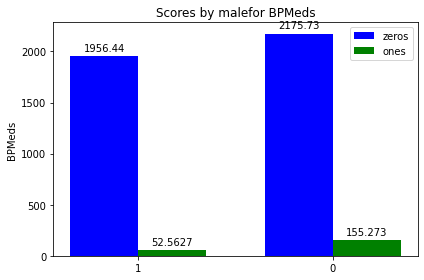

prevalentStroke
0.0    1997
1.0      12
Name: prevalentStroke, dtype: int64
0.0    2311
1.0      20
Name: prevalentStroke, dtype: int64


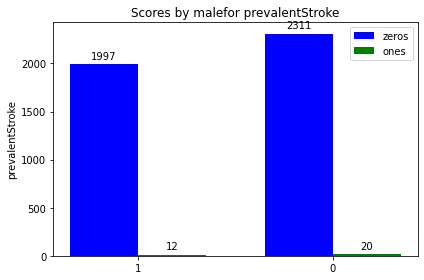

prevalentHyp
0.0    1304
1.0     705
Name: prevalentHyp, dtype: int64
0.0    1381
1.0     950
Name: prevalentHyp, dtype: int64


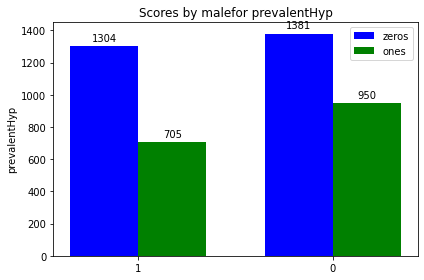

diabetes
0.0    1902
1.0     107
Name: diabetes, dtype: int64
0.0    2253
1.0      78
Name: diabetes, dtype: int64


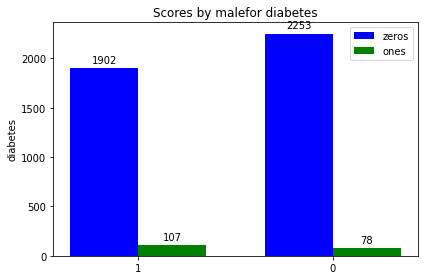

TenYearCHD
1.0    1100
0.0     909
Name: TenYearCHD, dtype: int64
0.0    1261
1.0    1070
Name: TenYearCHD, dtype: int64


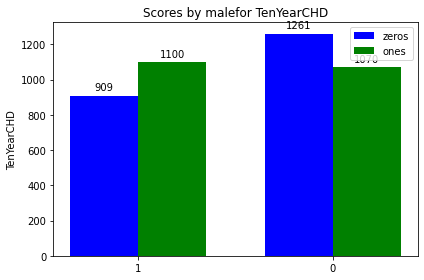

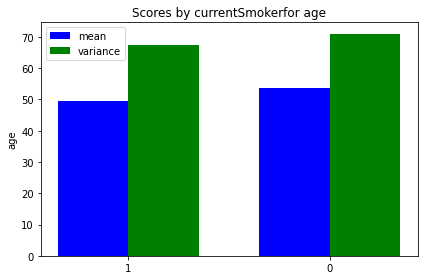

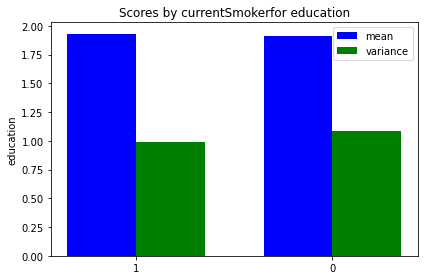

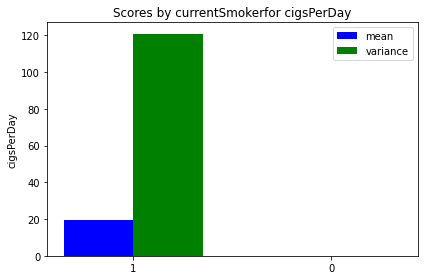

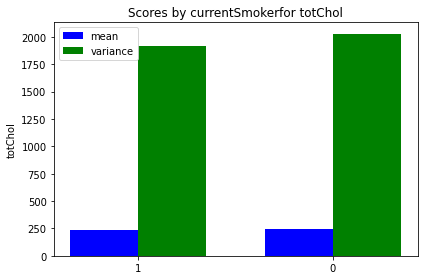

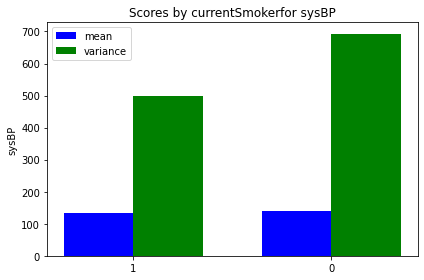

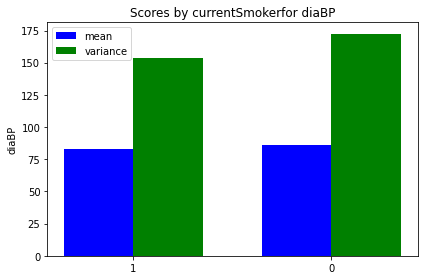

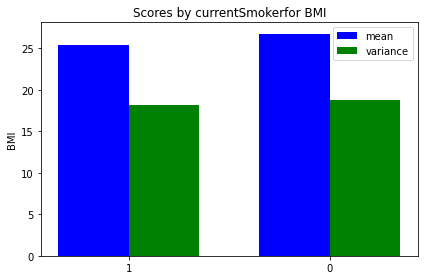

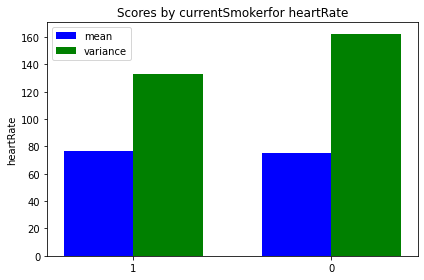

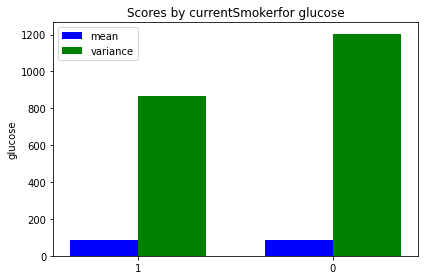

male
1.0    1291
0.0     919
Name: male, dtype: int64
0.0    1412
1.0     718
Name: male, dtype: int64


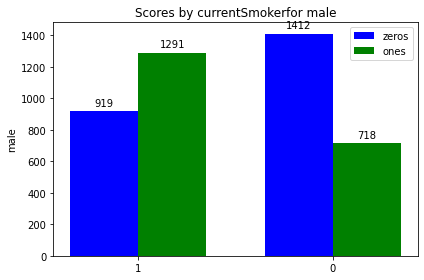

BPMeds
0.000000    2113
1.000000      66
0.029615      31
Name: BPMeds, dtype: int64
0.000000    1959
1.000000     140
0.029615      31
Name: BPMeds, dtype: int64


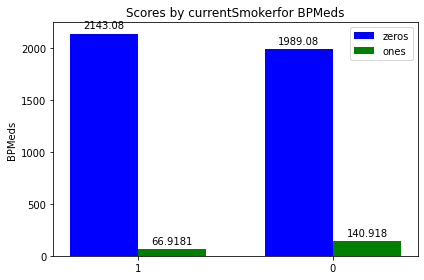

prevalentStroke
0.0    2197
1.0      13
Name: prevalentStroke, dtype: int64
0.0    2111
1.0      19
Name: prevalentStroke, dtype: int64


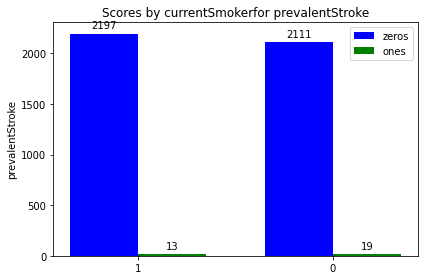

prevalentHyp
0.0    1514
1.0     696
Name: prevalentHyp, dtype: int64
0.0    1171
1.0     959
Name: prevalentHyp, dtype: int64


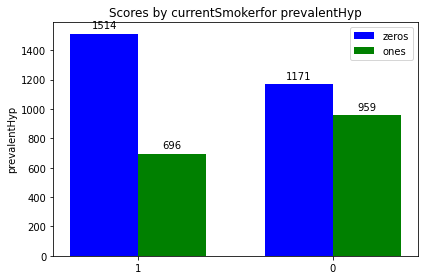

diabetes
0.0    2133
1.0      77
Name: diabetes, dtype: int64
0.0    2022
1.0     108
Name: diabetes, dtype: int64


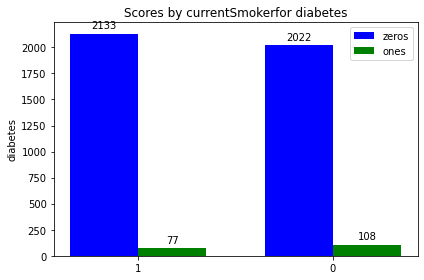

TenYearCHD
1.0    1124
0.0    1086
Name: TenYearCHD, dtype: int64
0.0    1084
1.0    1046
Name: TenYearCHD, dtype: int64


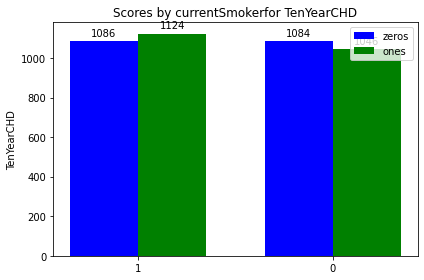

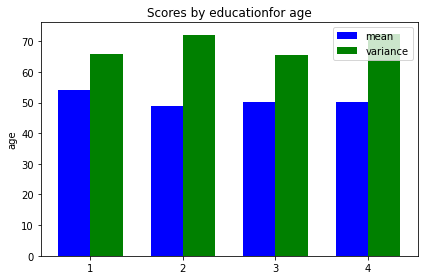

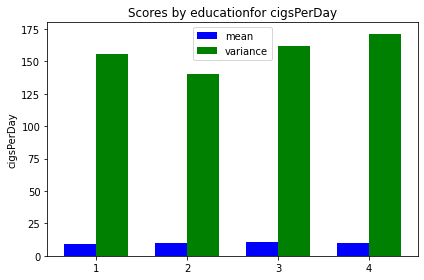

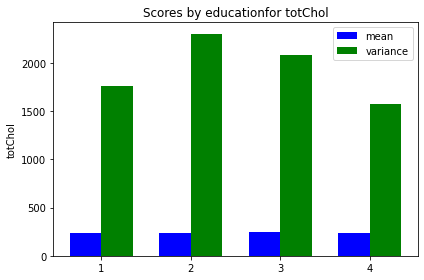

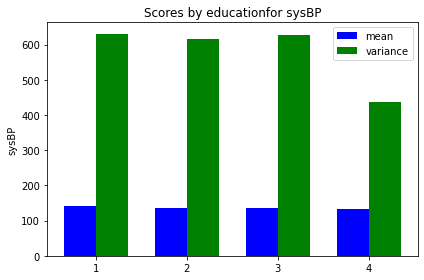

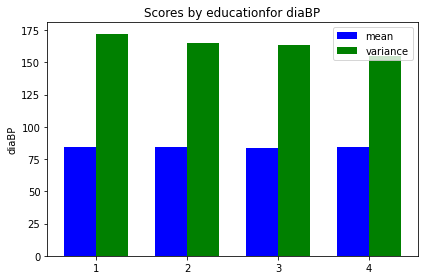

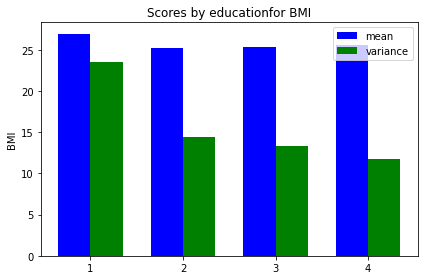

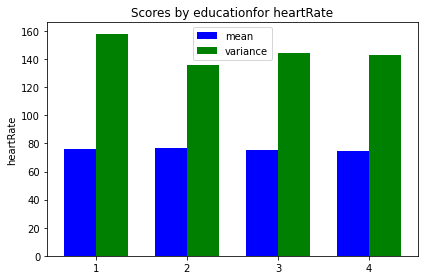

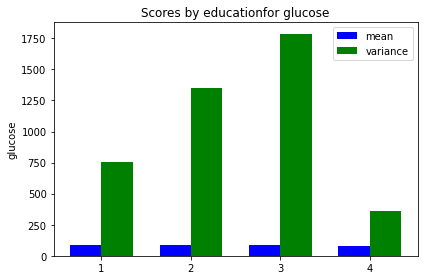

male
0.0    1005
1.0     937
Name: male, dtype: int64
0.0    733
1.0    441
Name: male, dtype: int64
0.0    392
1.0    236
Name: male, dtype: int64
1.0    323
0.0    165
Name: male, dtype: int64


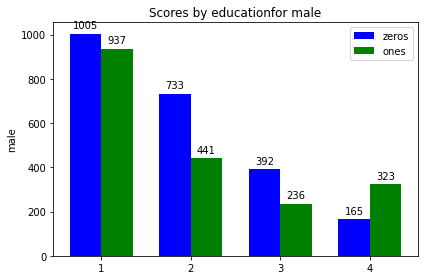

currentSmoker
0.0    1004
1.0     938
Name: currentSmoker, dtype: int64
1.0    648
0.0    526
Name: currentSmoker, dtype: int64
1.0    329
0.0    299
Name: currentSmoker, dtype: int64
0.0    256
1.0    232
Name: currentSmoker, dtype: int64


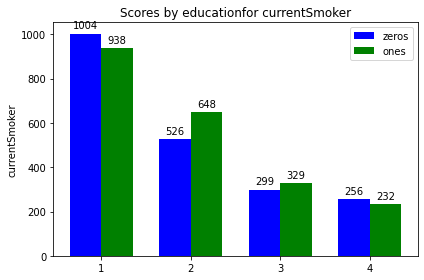

BPMeds
0.000000    1814
1.000000     100
0.029615      28
Name: BPMeds, dtype: int64
0.000000    1106
1.000000      57
0.029615      11
Name: BPMeds, dtype: int64
0.000000    592
1.000000     25
0.029615     11
Name: BPMeds, dtype: int64
0.000000    453
1.000000     23
0.029615     12
Name: BPMeds, dtype: int64


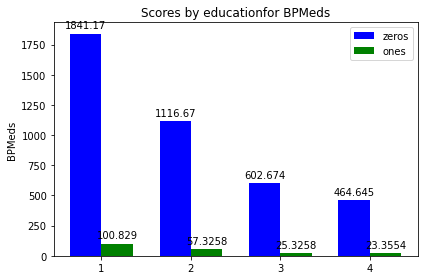

prevalentStroke
0.0    1914
1.0      28
Name: prevalentStroke, dtype: int64
0.0    1170
1.0       4
Name: prevalentStroke, dtype: int64
0.0    628
Name: prevalentStroke, dtype: int64
0.0    488
Name: prevalentStroke, dtype: int64


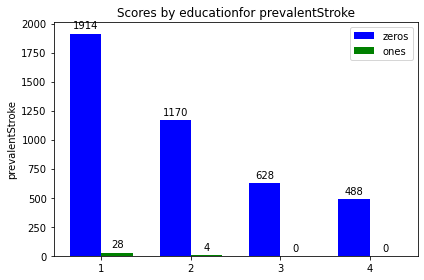

prevalentHyp
0.0    1096
1.0     846
Name: prevalentHyp, dtype: int64
0.0    775
1.0    399
Name: prevalentHyp, dtype: int64
0.0    424
1.0    204
Name: prevalentHyp, dtype: int64
0.0    315
1.0    173
Name: prevalentHyp, dtype: int64


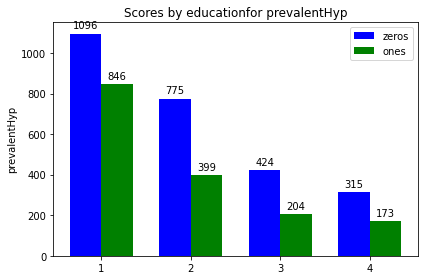

diabetes
0.0    1845
1.0      97
Name: diabetes, dtype: int64
0.0    1134
1.0      40
Name: diabetes, dtype: int64
0.0    602
1.0     26
Name: diabetes, dtype: int64
0.0    473
1.0     15
Name: diabetes, dtype: int64


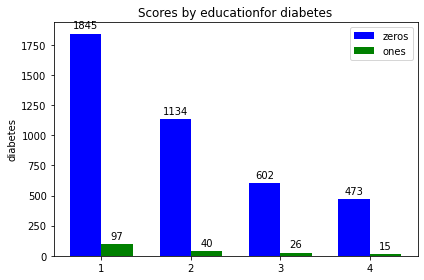

TenYearCHD
1.0    1091
0.0     851
Name: TenYearCHD, dtype: int64
0.0    678
1.0    496
Name: TenYearCHD, dtype: int64
0.0    336
1.0    292
Name: TenYearCHD, dtype: int64
0.0    251
1.0    237
Name: TenYearCHD, dtype: int64


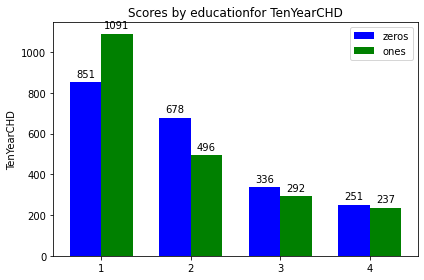

In [ ]:
import numpy as np

def building_a_fair_subset2(data, percentage):
    print(len(data.index))
    ages = ["30-39"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)

    for CHD_option in TenYearCHD:
        data3 = data.copy()
        data3.loc[data3["TenYearCHD"] != CHD_option, "TenYearCHD"] = np.NaN
        data3 = data3[data3.TenYearCHD.notnull()]
        data3.loc[data3["male"] != 0, "male"] = np.NaN
        data3 = data3[data3.male.notnull()]
        data3.loc[data3["age_bins"] != "40-49"] = np.NaN
        data3 = data3[data3.age_bins.notnull()]

        data8 = data3.sample(n=50, replace=True, random_state=1)
        data = data.append(data8)

    print(len(data.index))
    return data

data = building_a_fair_subset2(data, 2120)


demographic_groups_split(["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"], "age")
demographic_groups_split([1,0], "male")
demographic_groups_split([1,0], "currentSmoker")
demographic_groups_split([1,2,3,4],"education")

We now have a subset of the data where the outcome target variable is no longer skewed, but the bias within the dataset I believe still remains for each demographic group as it did beforehand. We can now run this dataset, as well as a fair subset, on the algorithm and see if we observe anymore bias. 

      male   age  education  currentSmoker  cigsPerDay  BPMeds  \
1267   0.0  46.0        3.0            0.0         0.0     0.0   
292    0.0  54.0        4.0            1.0        20.0     0.0   
1306   1.0  41.0        2.0            1.0        20.0     0.0   
1085   0.0  55.0        1.0            1.0        10.0     0.0   
3261   1.0  60.0        3.0            1.0        10.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1267              0.0           0.0       0.0    190.0  128.0   74.0  23.01   
292               0.0           0.0       0.0    242.0  125.0   76.0  22.16   
1306              0.0           0.0       0.0    260.0  120.0   72.5  26.36   
1085              0.0           0.0       0.0    346.0  131.0   81.0  22.69   
3261              0.0           0.0       0.0    227.0  122.0   80.0  25.64   

      heartRate  glucose  TenYearCHD age_bins  
1267       95.0     78.0         0.0    40-49  
292        70.0     87.0        

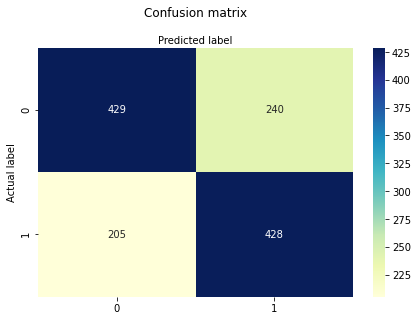

Accuracy: 0.6582181259600615
Precision: 0.6407185628742516
Recall: 0.6761453396524486


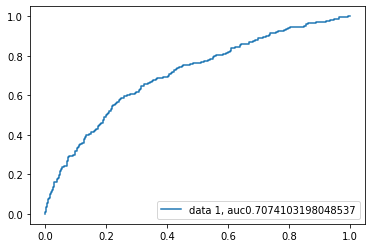

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[[419 226]
 [198 429]]


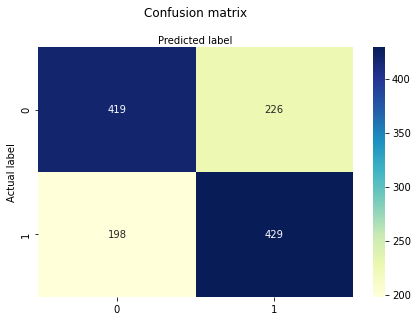

Accuracy: 0.6666666666666666
Precision: 0.6549618320610687
Recall: 0.6842105263157895


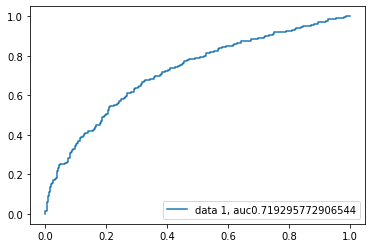

In [ ]:
def building_fair_sample_set(data):
    ages = ["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0, 1]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)


    for gender_option in genders:
        data4 = data.copy()
        data4.loc[data4["male"] != gender_option, "male"] = np.NaN
        data4 = data4[data4.male.notnull()]

        for smoker_option in currentSmokers:
            data5 = data4.copy()
            data5.loc[data5["currentSmoker"] != smoker_option, "currentSmoker"] = np.NaN
            data5 = data5[data5.currentSmoker.notnull()]

            for age in ages:
                data6 = data5.copy()
                data6.loc[data6["age_bins"] != age, "age_bins"] = np.NaN
                data6 = data6[data6.age_bins.notnull()]
                if len(data6.index) != 0:
                    if count == 0:
                        data7 = data6.sample(n=265, replace=True, random_state=1)
                        count +=1

                    else:
                        data8 = data6.sample(n=265, replace=True, random_state=1)
                        data7 = data7.append(data8)


    print(data7)
    return data7




labels = ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])

print(data.head(5))

print(data["TenYearCHD"].value_counts())
import numpy as np

data2 = building_fair_sample_set(data)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm


feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

def prediction_on_two_datasets(data, key):
    X = data[feature_cols] # Features
    y = data.TenYearCHD # Target variable

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
    
    if key == 1:
        X = data2[feature_cols] # Features
        y = data2.TenYearCHD # Target variable
        X_train2,X_test,y_train2,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression()

    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    # svmd = svm.SVC(kernel='linear',probability= True)

    # svmd.fit(X_train, y_train)
    # y_pred = svmd.predict(X_test)

    from sklearn import metrics

    dtf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(dtf_matrix)

    # also need to visualise the confusion matrix using a Heatmap

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_names = [0,1]
    fix, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

    # precision means when a model makes a prediction, how often it is correct.
    # when my model predicts patients are going to suffer from diabetes, it was correct
    # 76% of the time.

    y_prob = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

    auc = metrics.roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
    plt.legend(loc=4)
    plt.show()

prediction_on_two_datasets(data, 0)
prediction_on_two_datasets(data, 1)


Last time when we ran the model, there was no obvious overfitting or underfitting within the data. However it was massively skewed and predicted positive 98.4 % of the time. I would say although I don't believe any overfitting is occuring when we run the algorithm on the newly balanced data, the number of false negatives is quite high at around 15.7%. This is not something we want in medical diagnosis.


After testing with the new fair dataset, I would first say it has generalised similarly to before. However, as this is not new data we cannot use it as "testing" data and so cannot claim anything about how the model works with new data. Although the model does perform slightly better, with a lower percentage of both false positives and false negatives, the benefit is not as drastic in comparison to last time. This could mean that balancing the outcome has maybe lessened the extent of bias or increased the overall distribution of demographic groups within the dataset.

1100
1070
0.547536087605774
0.459030459030459


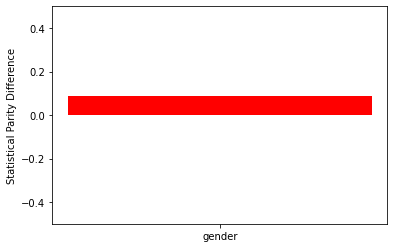

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
male_data = data.copy()
female_data = data.copy()

male_data.loc[male_data["male"] != 1, "male"] = np.NaN
male_data = male_data[male_data.male.notnull()]
male_total = len(male_data.index)


male_data.loc[male_data["TenYearCHD"] != 1, "TenYearCHD"] = np.NaN
male_data = male_data[male_data.TenYearCHD.notnull()]
# this is the number of males in the data set 
male_pos_outcomes = len(male_data.index)


female_data.loc[female_data["male"] != 0, "male"] = np.NaN
female_data = female_data[female_data.male.notnull()]
female_total = len(female_data.index)

female_data.loc[female_data["TenYearCHD"] != 1, "TenYearCHD"] = np.NaN
female_data = female_data[female_data.TenYearCHD.notnull()]
# this is the number of males in the data set 
female_pos_outcomes = len(female_data.index)


print(male_pos_outcomes)
print(female_pos_outcomes)

prob_pos_given_male = male_pos_outcomes/male_total
prob_pos_given_female = female_pos_outcomes/female_total

print(prob_pos_given_male)
print(prob_pos_given_female)
spd_diff = prob_pos_given_male - prob_pos_given_female

x = "gender"

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, spd_diff, width= 0.25,color= 'r')
plt.ylabel("Statistical Parity Difference")
plt.ylim(-0.5, 0.5)
plt.show()

This shows that the bias remains the same with the resampled skewed variable. 

# Part 4: Fair Machine Learning Implementation



## Prep-processing Bias Mitigation: Reweighing

I have decided I am going to reweight my data through sampling data from the minority group to get the expected outcome for both male and female equal to 0.5, thus meeting demographic parity. I decided not to undersample in the dataset, as I thought this we would lose valuable information that may aid in increasing accuracy for the predictive algorithm. Instead I oversampled data for both the outcome of male who did not have CHD and females who did have CHD to meet the demographic parity condition.

0    2420
1    1820
Name: male, dtype: int64
(4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: f

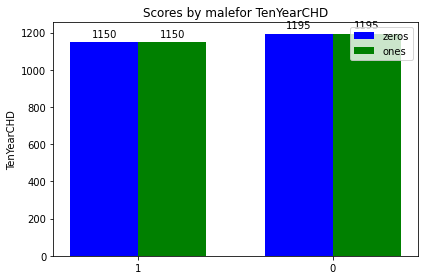

0.0    2345
1.0    2345
Name: TenYearCHD, dtype: int64
[[755 440]
 [378 742]]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


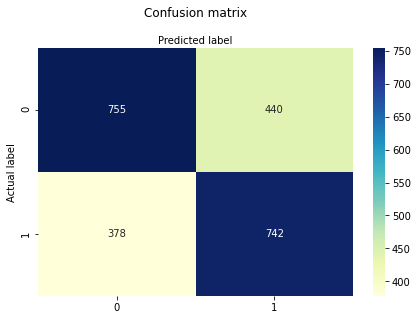

Accuracy: 0.6466522678185745
Precision: 0.6277495769881557
Recall: 0.6625


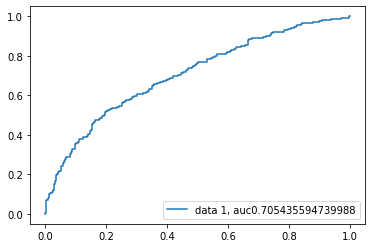

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[[586 289]
 [415 735]]


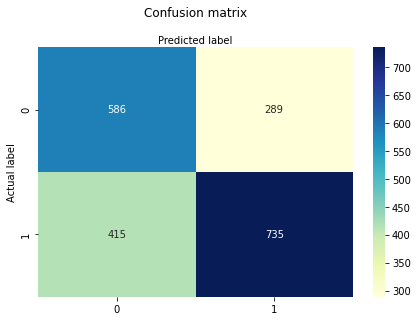

Accuracy: 0.6523456790123456
Precision: 0.7177734375
Recall: 0.6391304347826087


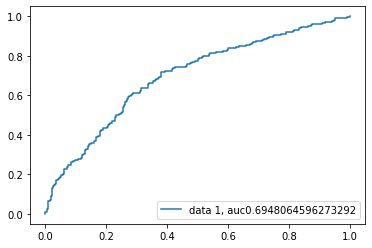

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('framingham.csv')

print(data["male"].value_counts())

print(data.shape)
print(data.info())
print(data.isnull().values.any())


# maybe we shouldn't do it for rescaling.


def building_a_fair_subset(data, percentage):
    ages = ["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0, 1]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)

    for CHD_option in TenYearCHD:
        data3 = data.copy()
        data3.loc[data3["TenYearCHD"] != CHD_option, "TenYearCHD"] = np.NaN
        data3 = data3[data3.TenYearCHD.notnull()]

        if count == 0:
            data7 = data3.sample(n=percentage, replace=True, random_state=1)
            count += 1

        else:
            data8 = data3.sample(n=4240 - percentage, replace=True, random_state=1)
            data7 = data7.append(data8)

    return data7


data = building_a_fair_subset(data, 2020)
print(data["male"].value_counts())

def demographic_groups_split(demographic_group, feature_concerned,data):
    numeric_features = ["age", "education", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
    categoric_features = ["male", "TenYearCHD"]


    for feature2 in categoric_features:
        if feature2 != feature_concerned:
            print(feature2)
            if feature_concerned == "age":
                data["age_bins"] = pd.cut(data.age, bins=[-1, 20, 30, 40, 50, 60, 70, 80, 90],
                                          labels=["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79",
                                                  "80-89"])
                return

            ones = []
            zeros = []

            for category in demographic_group:
                data3 = data.copy()
                data3["temp"] = 1
                if feature_concerned == "age":
                    data3.loc[data3["age_bins"] != category, "temp"] = np.NaN

                else:
                    data3.loc[data3[feature_concerned] != category, "temp"] = np.NaN

                data3 = data3[data3.temp.notnull()]
                print(data3[feature2].value_counts())

                zeros.append(len(data3.index) - data3[feature2].sum())
                ones.append(data3[feature2].sum())

            X = np.arange(len(demographic_group))
            width = 0.35  # the width of the bar
            fig, ax = plt.subplots()
            bar1 = ax.bar(X - width / 2, zeros, color='b', width=0.35, label='zeros')
            bar2 = ax.bar(X + width / 2, ones, color='g', width=0.35, label='ones')

            ax.set_ylabel(feature2)
            ax.set_title('Scores by ' + str(feature_concerned) + 'for ' + str(feature2))
            ax.set_xticks(X)
            ax.set_xticklabels(demographic_group)
            ax.legend()
            fig.tight_layout()
            ax.bar_label(bar1, padding=3)
            ax.bar_label(bar2, padding=3)
            plt.show()



demographic_groups_split(["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"], "age",data)

def building_a_fair_subset2(data):
    print(len(data.index))
    ages = ["30-39"]
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0]
    currentSmokers = [0, 1]
    TenYearCHD = [0, 1]
    count = 0
    sample_set = data.iloc[0]
    print(sample_set)

    for CHD_option in TenYearCHD:
        data3 = data.copy()
        data3.loc[data3["TenYearCHD"] != CHD_option, "TenYearCHD"] = np.NaN
        data3 = data3[data3.TenYearCHD.notnull()]
        data3.loc[data3["male"] != 0, "male"] = np.NaN
        data3 = data3[data3.male.notnull()]
        data3.loc[data3["age_bins"] != "40-49"] = np.NaN
        data3 = data3[data3.age_bins.notnull()]

        data8 = data3.sample(n=50, replace=True, random_state=1)
        data = data.append(data8)

    print(len(data.index))
    return data

data = building_a_fair_subset2(data)


def building_a_fair_subset3(data):
    print(len(data.index))
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0,1]
    count = 0

    data3 = data.copy()
    data4 = data.copy()

    data3.loc[data3["TenYearCHD"] != 0, "TenYearCHD"] = np.NaN
    data3 = data3[data3.TenYearCHD.notnull()]
    data3.loc[data3["male"] != 1, "male"] = np.NaN
    data3 = data3[data3.male.notnull()]
    data8 = data3.sample(n=275, replace=True, random_state=1)
    data = data.append(data8)


    data4.loc[data4["TenYearCHD"] != 1, "TenYearCHD"] = np.NaN
    data4 = data4[data4.TenYearCHD.notnull()]
    data4.loc[data4["male"] != 0, "male"] = np.NaN
    data4 = data4[data4.male.notnull()]
    data8 = data4.sample(n=75, replace=True, random_state=1)
    data = data.append(data8)


    print(len(data.index))
    return data


# If we are at a point where more women are equal than men,all we need to do is sample outcomes where men have it and
# try and get the distributions equal.


# we need to include in our sample 275 females with a zero
# and 75 males with a 0.

for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data_minority = data.copy()
data_minority.loc[data_minority["male"] != 0, "TenYearCHD"] = np.NaN
data_minority = data_minority[data_minority.TenYearCHD.notnull()]


data_majority = data.copy()
data_majority.loc[data_majority["male"] != 1, "TenYearCHD"] = np.NaN
data_majority = data_majority[data_majority.TenYearCHD.notnull()]


data = building_a_fair_subset3(data)
# this is the final even data that will be used

print("Boo")
print(len(data.index))
# we now how an unbiased data set for the demographic group of male and female

demographic_groups_split([1,0], "male",data)

labels = ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])


print(data["TenYearCHD"].value_counts())
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm


feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

X_min = data_minority[feature_cols]
X_maj = data_majority[feature_cols]

y_min = data_minority.TenYearCHD
y_maj = data_majority.TenYearCHD


def prediction_on_two_datasets(data,X_min_maj,y_min_maj, name):
    X = data[feature_cols] # Features
    y = data.TenYearCHD # Target variable

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression()

    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_min_maj)

    # svmd = svm.SVC(kernel='linear',probability= True)

    # svmd.fit(X_train, y_train)
    # y_pred = svmd.predict(X_test)

    from sklearn import metrics

    dtf_matrix = metrics.confusion_matrix(y_min_maj, y_pred)
    print(dtf_matrix)

    # also need to visualise the confusion matrix using a Heatmap

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_names = [0,1]
    fix, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Accuracy:",metrics.accuracy_score(y_min_maj, y_pred))
    print("Precision:",metrics.precision_score(y_min_maj, y_pred))
    print("Recall:",metrics.recall_score(y_min_maj, y_pred))

    # precision means when a model makes a prediction, how often it is correct.
    # when my model predicts patients are going to suffer from diabetes, it was correct
    # 76% of the time.

    y_prob = logreg.predict_proba(X_min_maj)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_min_maj, y_prob)
    auc = metrics.roc_auc_score(y_min_maj, y_prob)
    
    plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
    plt.legend(loc=4)
    plt.show() 



prediction_on_two_datasets(data,X_min,y_min,"minority")
prediction_on_two_datasets(data,X_maj, y_maj,"majority")




### Comparing the results between majority and minority class



## Analysing the results of debiasing

I strongly believe that I have observed a reduction in bias between the majority and minority classes. As one last test before my conclusions, I decided to run the minority and majority classes on the original.

0    2420
1    1820
Name: male, dtype: int64
(4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: f

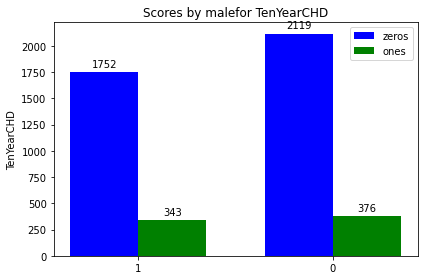

0.0    3871
1.0     719
Name: TenYearCHD, dtype: int64
[[2111    8]
 [ 290   11]]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


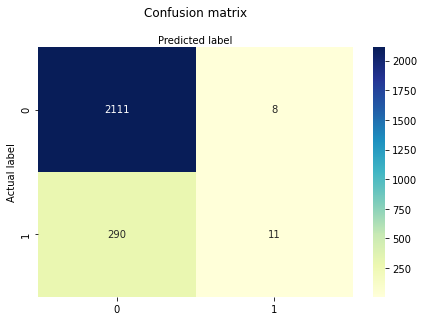

Accuracy: 0.8768595041322315
Precision: 0.5789473684210527
Recall: 0.036544850498338874


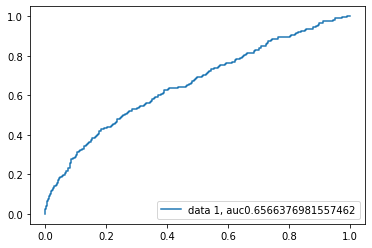

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[[1473    4]
 [ 334    9]]


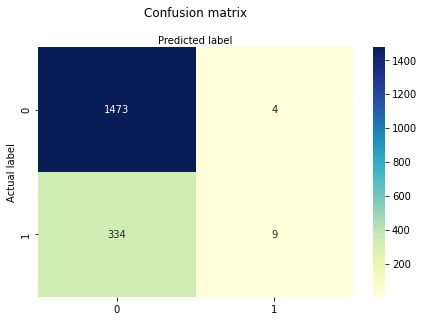

Accuracy: 0.8142857142857143
Precision: 0.6923076923076923
Recall: 0.026239067055393587


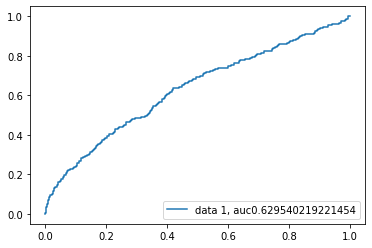

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('framingham.csv')

print(data["male"].value_counts())

print(data.shape)
print(data.info())
print(data.isnull().values.any())


# maybe we shouldn't do it for rescaling.



def demographic_groups_split(demographic_group, feature_concerned,data):
    numeric_features = ["age", "education", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
    categoric_features = ["male", "TenYearCHD"]


    for feature2 in categoric_features:
        if feature2 != feature_concerned:
            print(feature2)
            if feature_concerned == "age":
                data["age_bins"] = pd.cut(data.age, bins=[-1, 20, 30, 40, 50, 60, 70, 80, 90],
                                          labels=["0-20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79",
                                                  "80-89"])
                return

            ones = []
            zeros = []

            for category in demographic_group:
                data3 = data.copy()
                data3["temp"] = 1
                if feature_concerned == "age":
                    data3.loc[data3["age_bins"] != category, "temp"] = np.NaN

                else:
                    data3.loc[data3[feature_concerned] != category, "temp"] = np.NaN

                data3 = data3[data3.temp.notnull()]
                print(data3[feature2].value_counts())

                zeros.append(len(data3.index) - data3[feature2].sum())
                ones.append(data3[feature2].sum())

            X = np.arange(len(demographic_group))
            width = 0.35  # the width of the bar
            fig, ax = plt.subplots()
            bar1 = ax.bar(X - width / 2, zeros, color='b', width=0.35, label='zeros')
            bar2 = ax.bar(X + width / 2, ones, color='g', width=0.35, label='ones')

            ax.set_ylabel(feature2)
            ax.set_title('Scores by ' + str(feature_concerned) + 'for ' + str(feature2))
            ax.set_xticks(X)
            ax.set_xticklabels(demographic_group)
            ax.legend()
            fig.tight_layout()
            ax.bar_label(bar1, padding=3)
            ax.bar_label(bar2, padding=3)
            plt.show()



def building_a_fair_subset3(data):
    print(len(data.index))
    # we would like a subset of 50
    # take those that don't have 10yearCHD
    # then split this into male and female
    # then split this into smoker and non smoker
    # then take 10 age ranges for each value.
    genders = [0,1]
    count = 0

    data3 = data.copy()
    data4 = data.copy()

    data3.loc[data3["TenYearCHD"] != 0, "TenYearCHD"] = np.NaN
    data3 = data3[data3.TenYearCHD.notnull()]
    data3.loc[data3["male"] != 1, "male"] = np.NaN
    data3 = data3[data3.male.notnull()]
    data8 = data3.sample(n=275, replace=True, random_state=1)
    data = data.append(data8)


    data4.loc[data4["TenYearCHD"] != 1, "TenYearCHD"] = np.NaN
    data4 = data4[data4.TenYearCHD.notnull()]
    data4.loc[data4["male"] != 0, "male"] = np.NaN
    data4 = data4[data4.male.notnull()]
    data8 = data4.sample(n=75, replace=True, random_state=1)
    data = data.append(data8)


    print(len(data.index))
    return data


# If we are at a point where more women are equal than men,all we need to do is sample outcomes where men have it and
# try and get the distributions equal.


# we need to include in our sample 275 females with a zero
# and 75 males with a 0.

for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data_minority = data.copy()
data_minority.loc[data_minority["male"] != 0, "TenYearCHD"] = np.NaN
data_minority = data_minority[data_minority.TenYearCHD.notnull()]


data_majority = data.copy()
data_majority.loc[data_majority["male"] != 1, "TenYearCHD"] = np.NaN
data_majority = data_majority[data_majority.TenYearCHD.notnull()]


data = building_a_fair_subset3(data)
# this is the final even data that will be used

print("Boo")
print(len(data.index))
# we now how an unbiased data set for the demographic group of male and female

demographic_groups_split([1,0], "male",data)

labels = ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
data["age_bins"] = pd.cut(data.age, bins= [-1,20,30,40,50,60,70,80,90], labels= ["0-20","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])


print(data["TenYearCHD"].value_counts())
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm


feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

X_min = data_minority[feature_cols]
X_maj = data_majority[feature_cols]

y_min = data_minority.TenYearCHD
y_maj = data_majority.TenYearCHD


def prediction_on_two_datasets(data,X_min_maj,y_min_maj, name):
    X = data[feature_cols] # Features
    y = data.TenYearCHD # Target variable

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression()

    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_min_maj)

    # svmd = svm.SVC(kernel='linear',probability= True)

    # svmd.fit(X_train, y_train)
    # y_pred = svmd.predict(X_test)

    from sklearn import metrics

    dtf_matrix = metrics.confusion_matrix(y_min_maj, y_pred)
    print(dtf_matrix)

    # also need to visualise the confusion matrix using a Heatmap

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    class_names = [0,1]
    fix, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(dtf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print("Accuracy:",metrics.accuracy_score(y_min_maj, y_pred))
    print("Precision:",metrics.precision_score(y_min_maj, y_pred))
    print("Recall:",metrics.recall_score(y_min_maj, y_pred))

    # precision means when a model makes a prediction, how often it is correct.
    # when my model predicts patients are going to suffer from diabetes, it was correct
    # 76% of the time.

    y_prob = logreg.predict_proba(X_min_maj)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_min_maj, y_prob)
    auc = metrics.roc_auc_score(y_min_maj, y_prob)
    
    plt.plot(fpr, tpr, label="data 1, auc" + str(auc))
    plt.legend(loc=4)
    plt.show() 



prediction_on_two_datasets(data,X_min,y_min,"minority")
prediction_on_two_datasets(data,X_maj, y_maj,"majority")


## Conclusions: Debiased data

One of the easiest ways, although not always clear, in seeing if debiasing has occured is to see how accurately the algorithm predicts the majority and minority classes. If there is a major difference this can be seen to be an indication of bias. When I ran the majority and minority subset on the original data, the accuracy of predicting male outcomes correctly compared to females was 0.87 compared to 0.81. After we have run balanced the original data and run our ML algorithm, we have found it to be 0.646 and 0.652 which is obviously much closer. 

The overall statistical parity is met completely. This was what the resampling algorithm was designed to do and so it has been met. Let us look at how it has affected other fair metrics as well. 

When looking at Disparate Impact, we now have the following: DO THE DISPARATE IMPACT TABLE and show that it equals 1.0098
This is incredibly close to one which is a good indication that the bias has been reduced. 

Also when using the "Average Odds difference" as a fairness metric, this is the average difference between False postive rates and True Positive rates between Males and Females. Show in your project report that this should be equal to 0.03065 which is very close to 0 and so is another indication that the data is debiased. 

I think that all of these indicators combined suggest that the fair algorithm I have developed has been a success and I have mitigated the bias within the data. 

All you need to do now is compare it to the paper that you have selected and then you are finished. 



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a48b413a-16ef-4d17-b8f8-5f58c0caa0bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>